#INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

##Importing necessary libraries and data

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Splitting the dataset into training and testing sets
# Hyperparameter tuning using GridSearchCV
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split, GridSearchCV

# Libraries to help with data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Import necessary libraries for model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing function to calculate Variance Inflation Factor (VIF) for detecting multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing the main API for statistical models like regression analysis
import statsmodels.api as sm

# Importing a utility function to add a constant term (intercept) to regression models
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x)  # to display numbers rounded off to 2 decimal places

##Loading the dataset

In [4]:
# Loading dataset from CSV file
from google.colab import files
import pandas as pd

# Upload the CSV file manually
uploaded = files.upload()

# Read the CSV file (Replace 'your_file.csv' with the actual filename)
df = pd.read_csv("INNHotelsGroup.csv")




Saving INNHotelsGroup.csv to INNHotelsGroup.csv


## Data Overview

* Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.
* Get information about the number of rows and columns in the dataset.
* Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
* Check the statistical summary of the dataset to get an overview of the numerical columns of the data.


In [5]:
# View the first and last few rows of the dataset, without any overlap
pd.concat([df.head(), df.tail()])

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
0                   65.00                       0   Not_Canceled  
1                

In [6]:
# Checking the shape of the dataset
df.shape

(36275, 19)

In [7]:
# Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
# Get the statistical summary
df.describe().T

count    mean   std     min     25%  \
no_of_adults                         36275.00    1.84  0.52    0.00    2.00   
no_of_children                       36275.00    0.11  0.40    0.00    0.00   
no_of_weekend_nights                 36275.00    0.81  0.87    0.00    0.00   
no_of_week_nights                    36275.00    2.20  1.41    0.00    1.00   
required_car_parking_space           36275.00    0.03  0.17    0.00    0.00   
lead_time                            36275.00   85.23 85.93    0.00   17.00   
arrival_year                         36275.00 2017.82  0.38 2017.00 2018.00   
arrival_month                        36275.00    7.42  3.07    1.00    5.00   
arrival_date                         36275.00   15.60  8.74    1.00    8.00   
repeated_guest                       36275.00    0.03  0.16    0.00    0.00   
no_of_previous_cancellations         36275.00    0.02  0.37    0.00    0.00   
no_of_previous_bookings_not_canceled 36275.00    0.15  1.75    0.00    0.00   
avg_price_per_room                   36275.00  103.42 35.09    0.00   80.30   
no_of_special_requests               36275.00    0.62  0.79    0.00    0.00   

                                         50%     75%     max  
no_of_adults                            2.00    2.00    4.00  
no_of_children                          0.00    0.00   10.00  
no_of_weekend_nights                    1.00    2.00    7.00  
no_of_week_nights                       2.00    3.00   17.00  
required_car_parking_space              0.00    0.00    1.00  
lead_time                              57.00  126.00  443.00  
arrival_year                         2018.00 2018.00 2018.00  
arrival_month                           8.00   10.00   12.00  
arrival_date                           16.00   23.00   31.00  
repeated_guest                          0.00    0.00    1.00  
no_of_previous_cancellations            0.00    0.00   13.00  
no_of_previous_bookings_not_canceled    0.00    0.00   58.00  
avg_price_per_room                     99.45  120.00  540.00  
no_of_special_requests                  0.00    1.00    5.00

Key Observations:

* **Number of Rows & Columns:** 36,275 rows and 19 columns.

* **Data Types:**
  * Numeric columns (integers and floats) include values for adults, children, nights stayed, lead time, arrival details, price per room, and special requests.
  * Categorical columns include Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, and **"booking_status" (Categorical: "Canceled" or "Not_Canceled"), this is the target variable**.

* **Statistical Summary:**

  * The average number of adults per booking is about 1.84
  * The maximum number of children in a booking is 10 (*this is odd, will explore further...*).
  * The average lead time is around 85 days, with a maximum of 443 days.
  * The highest price per room is 540 euros, while the average is around 103 euros.

###Perform Sanity Checks and Explore the Data:

In [9]:
# Sanity checks
print("Running Data Sanity Checks...\n")

# 1️. Check for missing values
missing_values = df.isnull().sum()

# 2️. Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# 3️. Check for negative values in numerical columns (except logically allowed ones)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
negative_values = (df[numerical_columns] < 0).sum()

# 4️. Check for invalid categorical values
invalid_meal_plan = df[~df['type_of_meal_plan'].isin(df['type_of_meal_plan'].unique())]['type_of_meal_plan'].unique()
invalid_room_type = df[~df['room_type_reserved'].isin(df['room_type_reserved'].unique())]['room_type_reserved'].unique()
invalid_booking_status = df[~df['booking_status'].isin(["Canceled", "Not_Canceled"])]["booking_status"].unique()

# 5️. Check for outliers in numerical columns (Using IQR Method)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

# 6️. Check for `inf` and `NaN` values in the dataframe
inf_check = df.select_dtypes(include=np.number).apply(lambda x: np.isinf(x).sum())
nan_check = df.select_dtypes(include=np.number).apply(lambda x: np.isnan(x).sum())

# Display sanity check results
print("**Sanity Check Summary**:")
print(f"Missing values per column:\n{missing_values}\n")
print(f"Duplicate rows count: {duplicate_rows}\n")
print(f"Negative values per column:\n{negative_values}\n")
print(f"Invalid Meal Plan Values: {invalid_meal_plan}\n")
print(f"Invalid Room Type Values: {invalid_room_type}\n")
print(f"Invalid Booking Status Values: {invalid_booking_status}\n")
print(f"Outliers detected per column:\n{outliers}\n")
print(f"Infinite values detected:\n{inf_check}\n")
print(f"NaN values detected:\n{nan_check}\n")

print("**Sanity Checks Completed!**")



Running Data Sanity Checks...

**Sanity Check Summary**:
Missing values per column:
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Duplicate rows count: 0

Negative values per column:
no_of_adults                            0
no_of_chi

**Sanity Checks Observations:**

1. **Missing Values:** No missing values detected in any column.
2. **Duplicate Rows:** No duplicate rows found.
3. **Negative Values:** No negative values detected in any numerical columns.
4. **Invalid Categorical Values:**
  * Meal Plan: No invalid entries.
  * Room Type: No invalid entries.
  * Booking Status: No invalid entries.
5. **Outliers (IQR Method):**
  * Significant outliers exist in:
    * Number of adults (10,167 records)
    * Number of children (2,698 records)
    * Number of weekend nights (21 records)
    * Number of week nights (324 records)
    * Required car parking space (1,124 records)
    * Lead time (1,331 records)
    * Arrival year (6,514 records, possibly data entry issues)
    * Repeated guest (930 records)
    * Previous cancellations (338 records)
    * Previous bookings not canceled (812 records)
    * Average price per room (1,696 records)
    * Special requests (761 records)
6. **Inf/nan:**
    * No inf/nan values found.

In [10]:
# Create a copy of the data to avoid any changes to original data
data = df.copy()

In [11]:
df.shape, data.shape

((36275, 19), (36275, 19))

## Exploratory Data Analysis (EDA):
Note: Keeping objective in sight - to analyze the data provided and find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

* **Focus will be on the model building aspects for key insights.**
* **Additional EDA can be seen in the <a href = #link1>appendix section</a> for more insights into the dataset.**

### Leading Questions + Key Variables EDA:

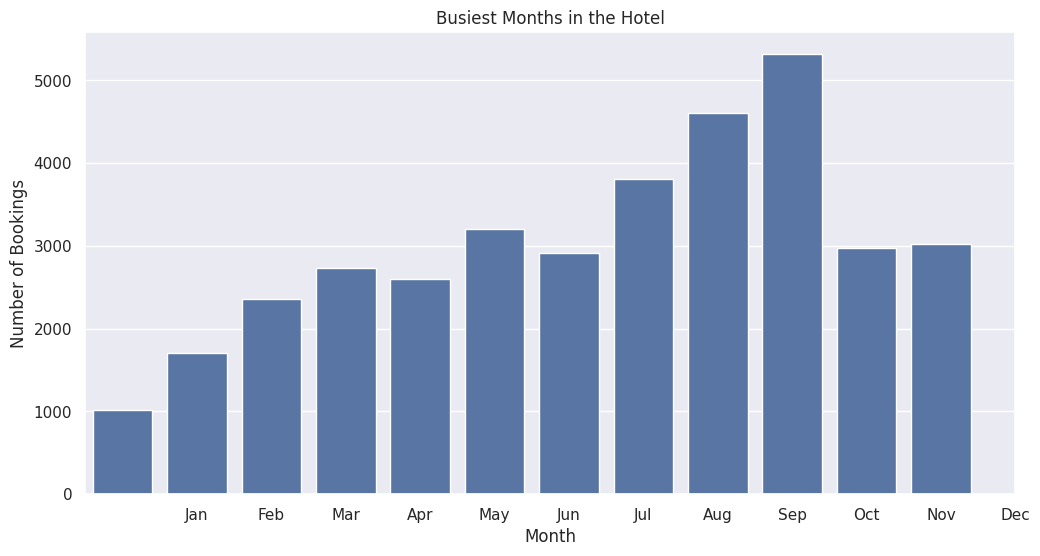

1     1014
2     1704
3     2358
4     2736
5     2598
6     3203
7     2920
8     3813
9     4611
10    5317
11    2980
12    3021
Name: arrival_month, dtype: int64


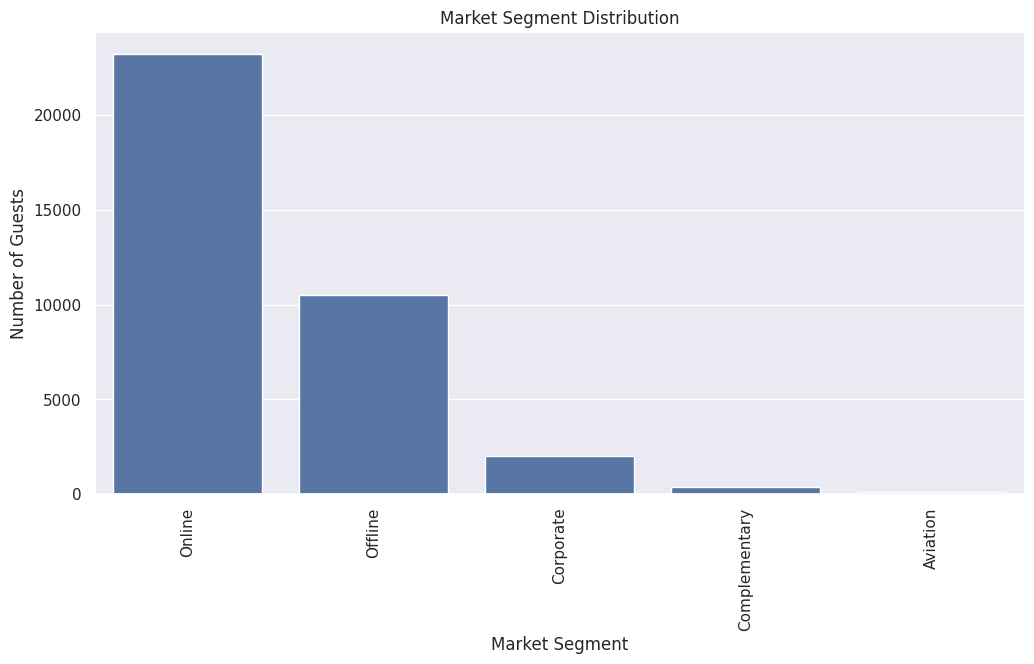

The market segment most of the guest come from is 'Online'


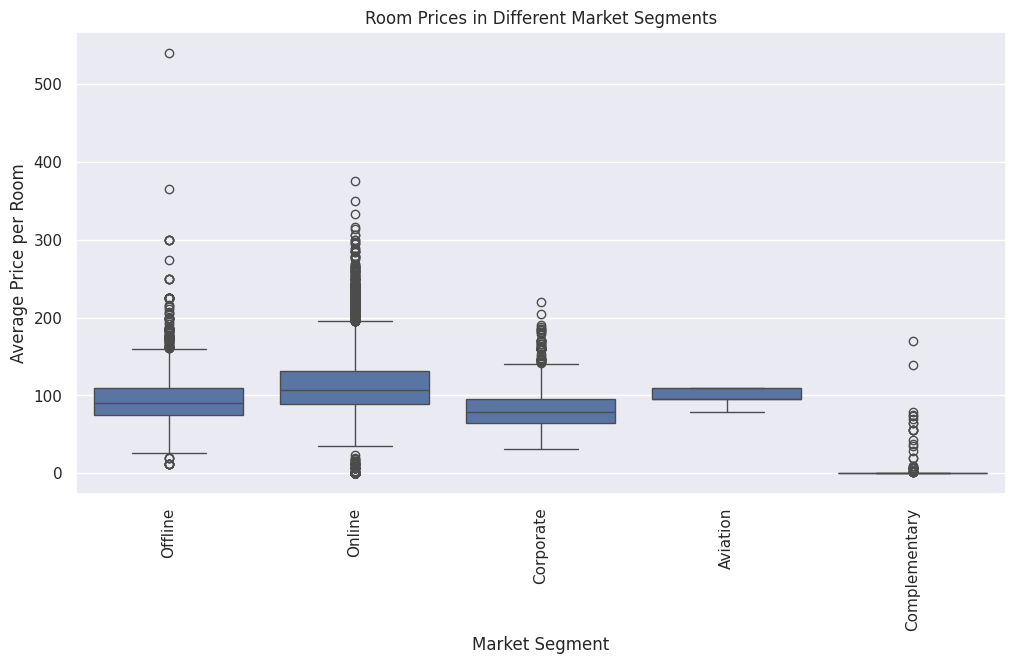

  market_segment_type  avg_price_per_room
0              Online              112.26
1            Aviation              100.70
2             Offline               91.63
3           Corporate               82.91
4       Complementary                3.14


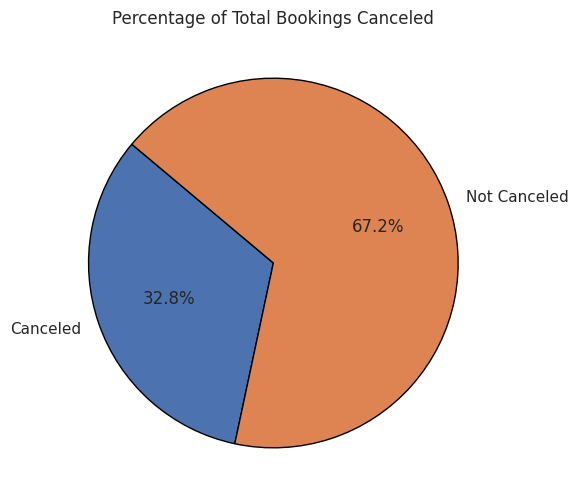

The percentage of bookings canceled is 32.76%


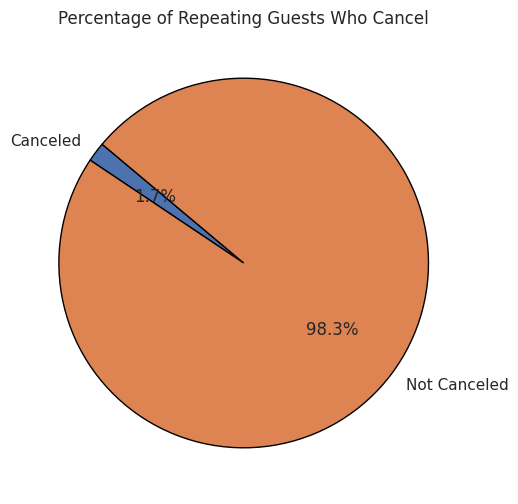

The percentage of repeating guests who cancel is 1.72%


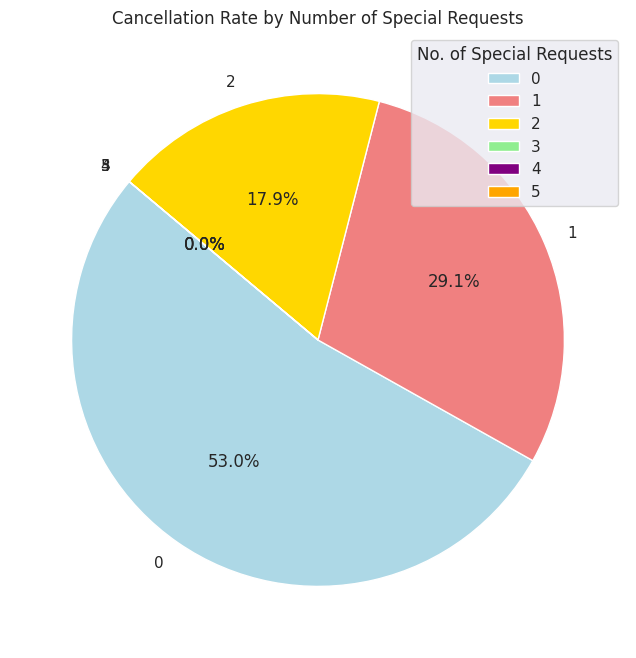

no_of_special_requests
0   43.21
1   23.77
2   14.60
3    0.00
4    0.00
5    0.00
Name: booking_status, dtype: float64

In [12]:
# Setting style for Leading Questions EDA
sns.set(style="darkgrid")

#--------------------Q1: What are the busiest months in the hotel?----------------------------------------
# Count of bookings per month
busiest_months = data['arrival_month'].value_counts().sort_index()

# Visualize
plt.figure(figsize=(12, 6));
sns.barplot(x=busiest_months.index, y=busiest_months.values)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Busiest Months in the Hotel")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.show()

# Get booking counts for each month
booking_counts = data['arrival_month'].value_counts().sort_index()
# Display the booking counts
print(booking_counts)


#--------------------Q2: Which market segment do most of the guests come from?----------------------------
# Market segment counts
market_segment_counts = data['market_segment_type'].value_counts()
# Check if market_segment_counts is empty
if not market_segment_counts.empty:

    # Market Segment Distribution
    plt.figure(figsize=(12, 6));
    sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values)
    plt.xlabel("Market Segment")
    plt.ylabel("Number of Guests")
    plt.title("Market Segment Distribution")
    plt.xticks(rotation=90)
    plt.show()
    # Print the market segment most of the guest come from is ' '
    print(f"The market segment most of the guest come from is '{market_segment_counts.idxmax()}'")
else:
    print("No data available for market segment distribution.")

#--------------------Q3: What are the differences in room prices in different market segments?--------------
# Visualize
plt.figure(figsize=(12, 6));
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=data)
plt.xlabel("Market Segment")
plt.ylabel("Average Price per Room")
plt.title("Room Prices in Different Market Segments")
plt.xticks(rotation=90)
plt.show()

# Calculate the mean of avg_price_per_room for each unique market_segment_type
df.groupby('market_segment_type').agg({'avg_price_per_room':'mean'}).sort_values(by='avg_price_per_room',ascending=False).reset_index()
# Display the result
print(df.groupby('market_segment_type').agg({'avg_price_per_room':'mean'}).sort_values(by='avg_price_per_room',ascending=False).reset_index())

#--------------------Q4: What percentage of bookings are canceled?-------------------------------------------
# Compute canceled bookings
total_bookings = len(data)
canceled_bookings = len(data[data['booking_status'] == 'Canceled'])

# Calculate percentage
percentage_canceled_total = (canceled_bookings / total_bookings) * 100

# Prepare data for pie chart
total_cancel_data = [canceled_bookings, total_bookings - canceled_bookings]
total_labels = ['Canceled', 'Not Canceled']

# Display pie chart
plt.figure(figsize=(6, 6));
plt.pie(total_cancel_data, labels=total_labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Total Bookings Canceled')
plt.show()

# Display the result
print(f"The percentage of bookings canceled is {percentage_canceled_total:.2f}%")

#--------------------Q5: What percentage of repeating guests cancel?------------------------------------------
# Calculate the percentage of repeating guests who cancel
repeated_guests = data[data['repeated_guest'] == 1]
canceled_repeated_guests = repeated_guests[repeated_guests['booking_status'] == 'Canceled']

# Calculate percentage
percentage_canceled = (len(canceled_repeated_guests) / len(repeated_guests)) * 100

# Prepare data for pie chart
cancel_data = [len(canceled_repeated_guests), len(repeated_guests) - len(canceled_repeated_guests)]
labels = ['Canceled', 'Not Canceled']

# Display percentage and pie chart
plt.figure(figsize=(6, 6));
plt.pie(cancel_data, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Repeating Guests Who Cancel')
plt.show()

# Display result
print(f"The percentage of repeating guests who cancel is {percentage_canceled:.2f}%")

#--------------------Q6: Do special requirements when booking a room affect booking cancellation?--------------
# Analyze the impact of special requests on booking cancellation

# Aggregate booking cancellation data based on special requests
cancellation_by_requests = data.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).unstack()

# Fill NaN values with 0 to represent no cancellations in those cases
cancellation_by_requests = cancellation_by_requests.fillna(0)

# Compute the overall cancellation percentage based on special requests
cancellation_rates = data.groupby('no_of_special_requests')['booking_status'].apply(lambda x: (x == 'Canceled').mean()) * 100

# Visualize the impact with a pie chart
plt.figure(figsize=(8, 8));
plt.pie(cancellation_rates, labels=cancellation_rates.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'gold', 'lightgreen', 'purple', 'orange'])
plt.title("Cancellation Rate by Number of Special Requests")
plt.legend(title="No. of Special Requests")
plt.show()


# Display numerical summary
cancellation_rates

**Leading Questions Solution Insights:**

**Q1. Busiest Months in the Hotel:**

* The top busiest month in the hotel is October, next would be September, and August based on booking counts.
* There is a noticeable trend in the busiest months for bookings, which can help optimize pricing and staffing.

**Q2. Market Segment Distribution:**

* The market segment most of the guest come from is 'Online'
* The majority of guests come from specific market segments, showing where marketing efforts should be focused.

**Q3. Room Prices Across Market Segments:**
**Price Variablility:**
* There is significant price variability in the **Online (112.26 euros) the highest**, Offline (91.63 euros), and Corporate market (82.91 euros) segments.
* Aviation (100.70 euros) and Complementary (3.14 euros) segments have more stable room prices with a smaller range.

  **Median Prices**
  * Aviation segment has the highest median room price.
  * Complementary segment has the lowest median price, which suggests that these might be promotional or free bookings.

  **Outliers:**
  * Online and Offline bookings show a high number of outliers, indicating that some rooms were booked at significantly higher prices.
  * Corporate bookings also exhibit some high-price outliers.
  * Complementary segment has a cluster of outliers near zero, indicating potential free stays or highly discounted rates.

  **Price Range Comparison:**
  * Online & Offline segments show a wider spread, meaning prices fluctuate based on demand.
  * Corporate segment has a moderate range.
  * Aviation segment has a narrow and high price range, indicating consistency in pricing.
  * Complementary segment stays near zero, reinforcing that these might be free or discounted stays.

**Q4. Percentage of Bookings Canceled:**
    
  * A substantial portion of bookings (32.76%) are canceled, which affects revenue predictability.

**Q5. Percentage of Repeating Guests Who Cancel:**

  * Understanding how frequently returning guests cancel (1.72%) bookings helps in designing loyalty programs.


**Q6. Impact of Special Requests on Cancellations:**

  * Higher Special Requests = Lower Cancellation Rates
  * Guests with 0 special requests have the highest cancellation rate (43.2%).
  * Guests with 1 special request cancel less frequently (23.8% cancellation rate).
  * Guests with 2 special requests have an even lower cancellation rate (14.6%).
  * Guests with 3 or More Special Requests Do Not Cancel
  * Guests with 3, 4, or 5 special requests, the cancellation proportion is recorded as NaN (not available).These guests have a 100% booking completion rate.
  * It indicates that no cancellations occurred for these cases. And not indictive of missing data.

**INN Hotel Implications:**
* **Guests with more special requests are more committed to their bookings and  less likely to cancel. Possibly because they have specific needs (e.g., accessibility, room preferences), making them less flexible in changing plans.**
* **The hotel can encourage guests to make special requests during booking.Offering customized packages that might reduce cancellation rates.**

In [13]:
# Check correlation with the target variable (numerical features only) to determine most influential factors.
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_with_target = data[numerical_columns].corrwith(data['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0}))
correlation_with_target

no_of_adults                            0.09
no_of_children                          0.03
no_of_weekend_nights                    0.06
no_of_week_nights                       0.09
required_car_parking_space             -0.09
lead_time                               0.44
arrival_year                            0.18
arrival_month                          -0.01
arrival_date                            0.01
repeated_guest                         -0.11
no_of_previous_cancellations           -0.03
no_of_previous_bookings_not_canceled   -0.06
avg_price_per_room                      0.14
no_of_special_requests                 -0.25
dtype: float64

**Key Observations:**

* Lead Time (0.44)	Strongest positive correlation	The longer the lead time, the less likely a booking is canceled. This suggests that last-minute bookings tend to have higher cancellation rates.

* Avg. Price per Room (0.14)	Weak positive correlation	Higher room prices slightly reduce cancellations, possibly because premium customers are more committed.

* Arrival Year (0.18)	Positive correlation	More recent bookings have slightly lower cancellation rates.
* No. of Special Requests (-0.25)	Strongest negative correlation	More special requests increase cancellation risk, possibly because guests with specific needs might find better alternatives later.
* Repeated Guest (-0.11)	Negative correlation	Returning guests are less likely to cancel, though the effect is small.
* Required Car Parking Space (-0.09)	Slight negative correlation	Guests needing parking may have slightly higher cancellation rates, possibly due to availability issues.
* No. of Previous Cancellations (-0.03)	Near zero correlation	Past cancellations do not strongly predict future cancellations.
* No. of Previous Bookings Not Canceled (-0.06)	Small negative correlation	Guests with more past bookings are slightly less likely to cancel.
* No. of Adults (0.09), No. of Children (0.03)	Weak positive correlation	More adults or children slightly reduce cancellation likelihood.
* Arrival Month (-0.01), Arrival Date (0.01)	No significant correlation	The month and date of arrival do not impact cancellations much.

**Insights:**

* Reduce last-minute cancellations → Guests who book closer to check-in date are more likely to cancel. Offer non-refundable discounts for short lead times.
* Premium pricing may reduce cancellations → Higher-priced bookings are less likely to be canceled. Consider offering upgrades to improve retention.
* Repeated guests cancel less → Loyalty programs should be leveraged to encourage direct bookings.
* Guests with many special requests cancel more → Ensure early confirmations and personalized follow-ups for guests with multiple requests.


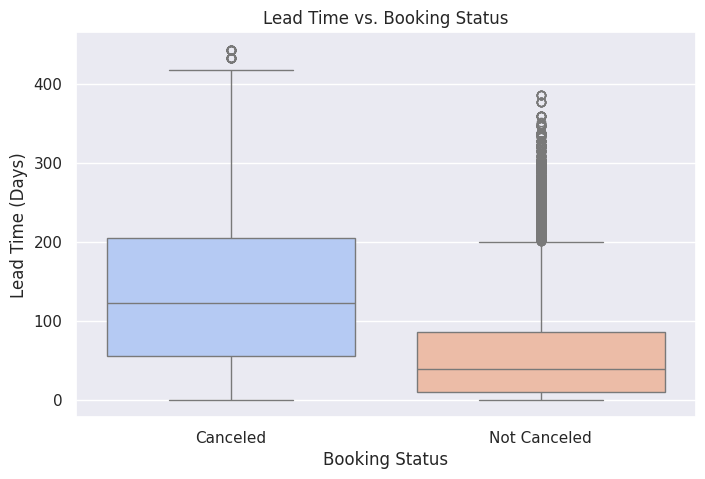

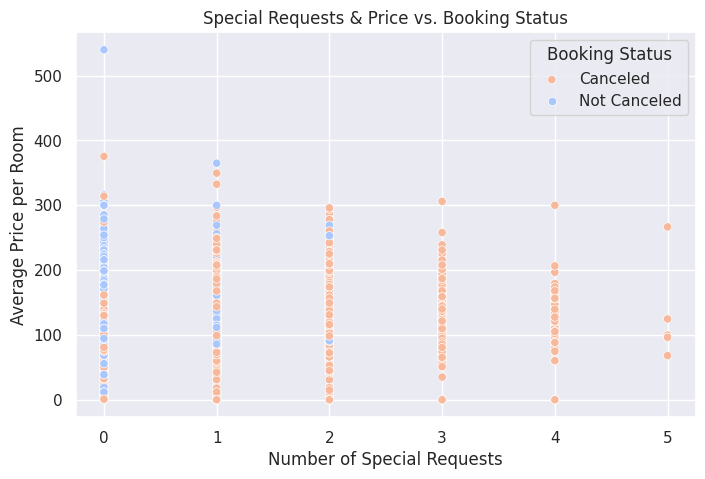

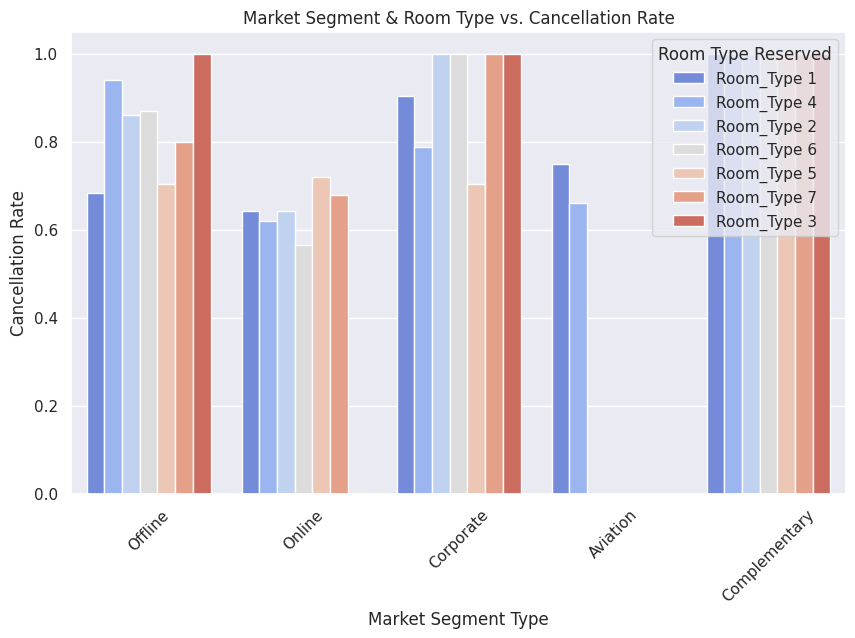

In [14]:
# Convert 'booking_status' to numeric for visualization (0 = Canceled, 1 = Not_Canceled)
data['booking_status'] = data['booking_status'].map({'Not_Canceled': 1, 'Canceled': 0})

# 1. Lead Time vs. Booking Status (Box Plot)
plt.figure(figsize=(8, 5));
sns.boxplot(x=data['booking_status'], y=data['lead_time'], palette="coolwarm")
plt.xticks([0, 1], ['Canceled', 'Not Canceled'])
plt.xlabel("Booking Status")
plt.ylabel("Lead Time (Days)")
plt.title("Lead Time vs. Booking Status")
plt.show()

# 2️. Special Requests & Price vs. Booking Status (Scatter Plot)
plt.figure(figsize=(8, 5));
sns.scatterplot(x=data['no_of_special_requests'], y=data['avg_price_per_room'], hue=data['booking_status'], palette="coolwarm")
plt.xlabel("Number of Special Requests")
plt.ylabel("Average Price per Room")
plt.title("Special Requests & Price vs. Booking Status")
plt.legend(title="Booking Status", labels=["Canceled", "Not Canceled"])
plt.show()

# 3️. Market Segment & Room Type vs. Cancellation Rate (Grouped Bar Plot)
plt.figure(figsize=(10, 6));
sns.barplot(x=data['market_segment_type'], y=data['booking_status'], hue=data['room_type_reserved'], ci=None, palette="coolwarm")
plt.xlabel("Market Segment Type")
plt.ylabel("Cancellation Rate")
plt.title("Market Segment & Room Type vs. Cancellation Rate")
plt.xticks(rotation=45)
plt.legend(title="Room Type Reserved")
plt.show()




Observations/Insights:

* Lead Time vs. Booking Status (Box Plot):

  * Canceled bookings tend to have longer lead times compared to non-canceled bookings.
  * Guests who book far in advance are more likely to cancel, possibly because they make multiple reservations and cancel later. The hotel can consider non-refundable options for long lead-time bookings.

* Special Requests & Price vs. Booking Status (Scatter Plot):

  * More special requests correlate with higher cancellation rates.
  * Guests making many special requests might be indecisive or more likely to switch hotels. INN Hotels should:
    * Confirm special requests early to secure bookings.
    * Require a deposit for high-request bookings to discourage cancellations.

* Market Segment & Room Type vs. Cancellation Rate (Grouped Bar Plot)
  * Some market segments (online bookings) have higher cancellation rates than corporate or aviation bookings.
  * Hotels could enforce stricter cancellation policies for high-risk segments and offer discounts or flexible options for low-risk corporate clients.


## Data Preprocessing for Logistic Regression Model:

- Missing value treatment (if needed):
  * Earlier sanity check observed that there are no missing values in the dataset.

- Feature engineering (if needed):
  * *Will drop non relevant variables.*
  
  * Earlier sanity check observed that:         
  * *Categorical Variables: Columns like type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status, need encoding.*

  * *Target Variable (booking_status): Alreay converted in EDA into a binary format (0 for Not_Canceled, 1 for Canceled).*

- Outlier detection and treatment (if needed):
  *  Earlier sanity check observed *outliers in dataset, will explore..*
- Any other preprocessing steps (if needed):
  * Earlier statistical summary observed that the *maximum number of children in a booking is 10, will explore..*

###Feature Engineering

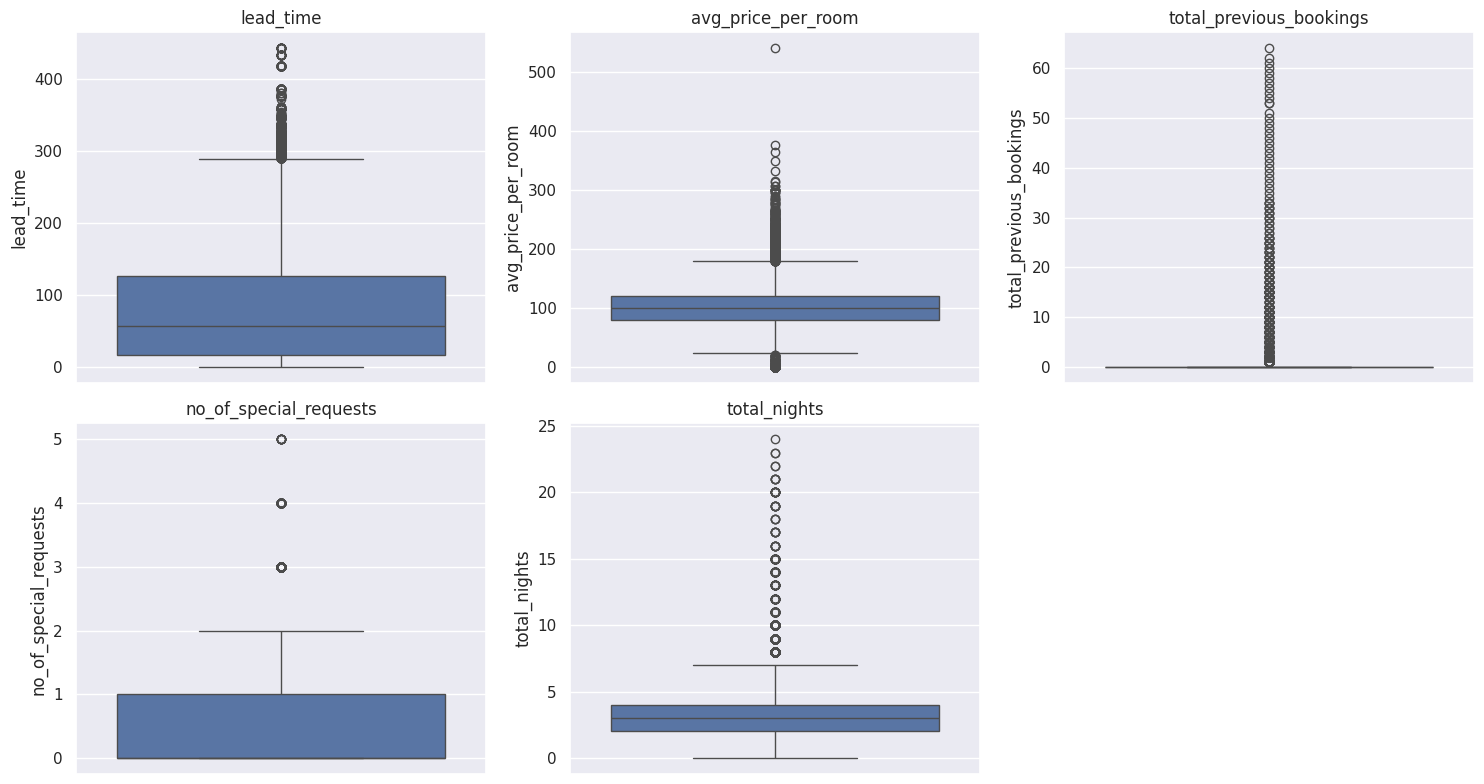

Column 'Booking_ID' dropped successfully.
Column 'no_of_weekend_nights' dropped successfully.
Column 'no_of_week_nights' dropped successfully.
Column 'no_of_previous_cancellations' dropped successfully.


In [15]:
# Feature Creation:
# 1. Total nights (sum of no of weekend nights and no of week nights)
data["total_nights"] = data["no_of_weekend_nights"] + data["no_of_week_nights"]

# 2. Total previous bookings (sum of previous cancellations and non-cancellations)
data["total_previous_bookings"] = data["no_of_previous_cancellations"] + data["no_of_previous_bookings_not_canceled"]

# 3. Special request indicator (whether any special requests were made)
data["has_special_requests"] = (data["no_of_special_requests"] > 0).astype(int)

# Outlier Detection:
# Select numerical columns for outlier detection (excluding categorical ones)
numerical_columns = ["lead_time", "avg_price_per_room", "total_previous_bookings",
                     "no_of_special_requests", "total_nights"]

# Dynamically determine subplot grid size
rows = -(-len(numerical_columns) // 3)  # Ensures correct number of rows
plt.figure(figsize=(15, rows * 4));

# Plot boxplots for numerical features
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


# Drop non relevant columns, 'Booking_ID', 'no_of_weekend_nights', 'no_of_week_nights', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'
# Function to drop a column if it exists
def drop_column_if_exists(df, column_name):
    """Drops a column if it exists in the DataFrame."""
    if column_name in df.columns:
        df = df.drop(columns=[column_name])
        print(f"Column '{column_name}' dropped successfully.")
    else:
        print(f"Column '{column_name}' not found in axis.")
    return df

# Define columns to drop
columns_to_drop = ['Booking_ID', 'no_of_weekend_nights', 'no_of_week_nights', 'no_of_previous_cancellations']

# Apply column drop function iteratively
for column in columns_to_drop:
    data = drop_column_if_exists(data, column)  # Ensure modifications persist


Outliers:

Observations/Insights:

* The boxplots reveal potential outliers in the following columns:

  * Lead Time -
    * The median lead time is around 50-100 days.
    * There are many outliers above 300 days, suggesting some guests book far in advance.
  * Average Price per Room -
    * The median room price is around 100-150, but some rooms are priced above 500.
    * There are outliers above 300, which might indicate luxury suites or special high-demand pricing.
  * Total Previous Bookings
    * The majority of guests have 0-2 previous bookings.
    * Some guests have over 60 past bookings, which are clear outliers.
  * No of Special Requests - Outliers are less pronounced.
  * Total Nights Stayed
  * Most guests stay 1-5 nights, but there are outliers above 20 nights

* Dropped variables:
  *  'Booking_ID'- its a unique identifier, it does not contribute to the predictive power in a model
  * 'no_of_weekend_nights', 'no_of_week_nights', ''no_of_previous_cancellations' - other features were created from them, and so they would have been redundant.

**Will not treat outliers, could have values that can nagetively impact the final prediction, if removed.**

### Other Preprocessing:


0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64


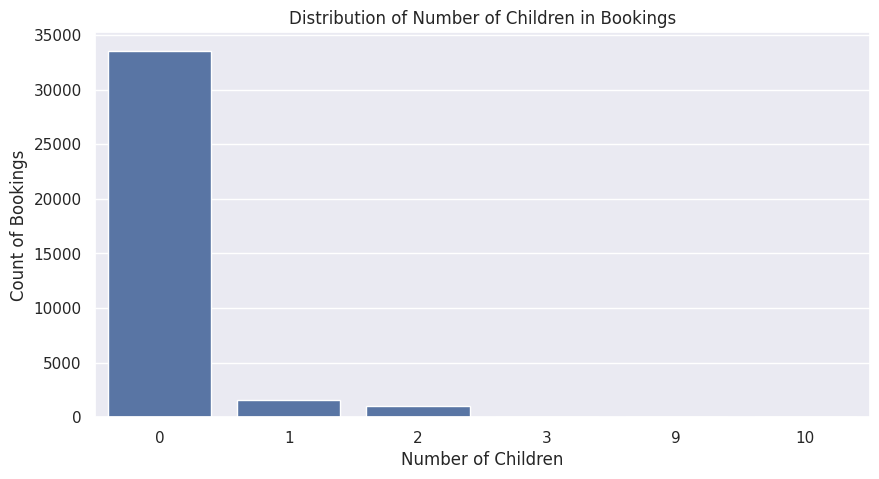

In [16]:
# Checking the distribution of 'no_of_children' values
children_counts = data['no_of_children'].value_counts().sort_index()

# Checking records where no_of_children is unusually high (greater than or equal to 5)
outlier_children_records = data[data['no_of_children'] >= 5]

# Display results
print(children_counts)

# Plot the distribution of 'no_of_children'
plt.figure(figsize=(10, 5));
sns.countplot(x=data["no_of_children"], order=sorted(data["no_of_children"].unique()))

plt.title("Distribution of Number of Children in Bookings")
plt.xlabel("Number of Children")
plt.ylabel("Count of Bookings")

plt.show()



Observations/Insights:
* The distribution plot shows that most bookings have 0-2 children, but a few cases have exceptionally high values (10 children).

* This could indicate:

  * Data Entry Errors: It might be unrealistic for a single hotel booking to accommodate 10 children, unless special group bookings where some family or group reservations might have been classified incorrectly.

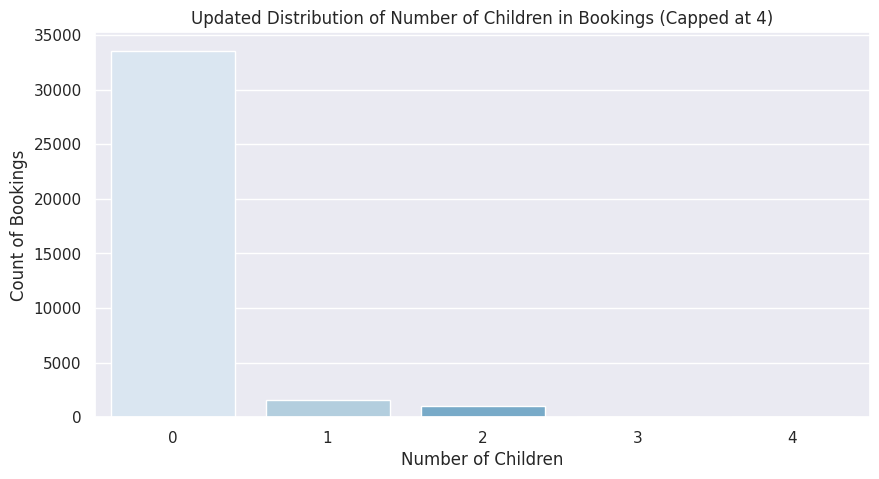

0    33577
1     1618
2     1058
3       19
4        3
Name: no_of_children, dtype: int64

In [17]:
# Cap the maximum number of children at 4
data['no_of_children'] = data['no_of_children'].apply(lambda x: min(x, 4))

# Recompute the distribution after capping
updated_children_counts = data['no_of_children'].value_counts().sort_index()

# Plot the updated distribution of 'no_of_children'
plt.figure(figsize=(10, 5));
sns.countplot(x=data["no_of_children"], order=sorted(data["no_of_children"].unique()), palette="Blues")

plt.title("Updated Distribution of Number of Children in Bookings (Capped at 4)")
plt.xlabel("Number of Children")
plt.ylabel("Count of Bookings")

plt.show()

# Display updated distribution
updated_children_counts



Observations/Insight:

* The number of children has been successfully capped at a maximum of 4. The updated distribution now ensures consistency without extreme values.

* Target solo travelers and couples → Since most guests do not bring children, the hotel should focus on business and couple-friendly offerings.
* Promote family-friendly options → Encourage families to book by offering discounted adjoining rooms or family packages.
* Optimize room availability → Since very few bookings include 3-4 children, the hotel may reallocate larger rooms to other guest segments to increase occupancy.

## Exploratory Data Analysis (EDA) After Preprocessing:


In [18]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    ax = sns.countplot(
        data=data,
        x=feature,
        palette='viridis',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage
    plt.xticks(rotation=90)  # rotate the x-axis labels
    plt.title(f"{feature.title()} Distribution")  # plot title
    plt.show()  # show the plot

In [19]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(16, 6), kde=False, bins=None):
    """
    Combines boxplot and histogram

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (16,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="aqua"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

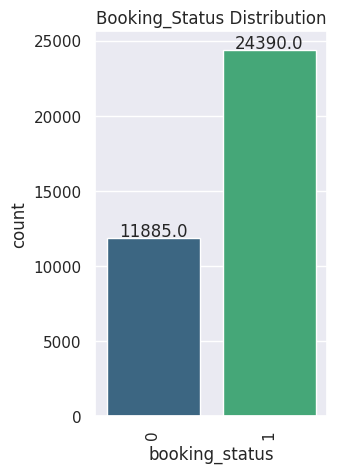

In [20]:
# labeled Barplot Booking Status
labeled_barplot(data, 'booking_status')


Observations/Insights:

* Higher Number of Confirmed Bookings
* More bookings are completed (24,390) than
* Only ~33% of bookings result in cancellations.
* This suggests relatively good booking retention.
Cancellations Are Still Significant

One-third of bookings get canceled, which is a substantial loss for the hotel.

* Introduce stricter cancellation policies → Reduce losses by requiring deposits for high-risk bookings (e.g., long lead-time, high special requests).
* Encourage rebooking instead of canceling → Offer discounts or flexible modifications instead of full cancellations.
* Analyze cancellation patterns further

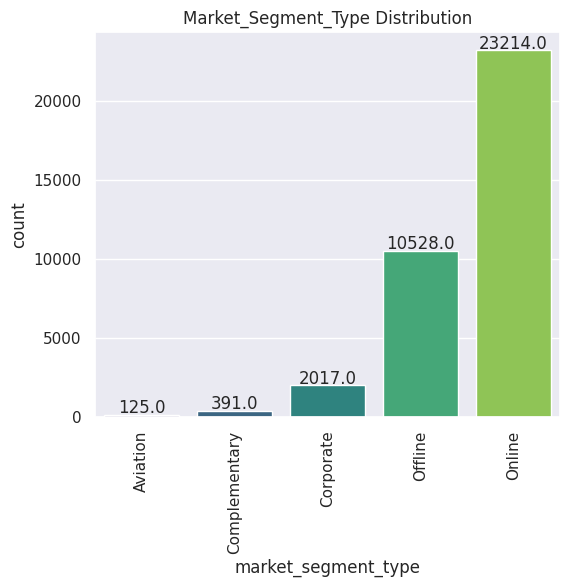

In [21]:
# Labeled barplot market segment
labeled_barplot(data, 'market_segment_type')


Observations/Insights:

Online and Offline Bookings Dominate

* Online bookings are the highest (23,214), followed by Offline bookings (10,528).
* These two segments account for the majority of reservations, indicating that digital and traditional travel agency bookings are key revenue sources.

Corporate & Complementary Segments Are Much Smaller

* Corporate bookings: Only 2,017 reservations, indicating that business travelers form a small but relevant customer base.
* Complementary bookings: 391 bookings, possibly from promotional stays, partnerships, or rewards programs.

Aviation Segment Is the Smallest

* Only 125 bookings come from aviation partnerships (airline crew accommodations).
* This may indicate limited business with airlines or that aviation guests prefer different accommodation options

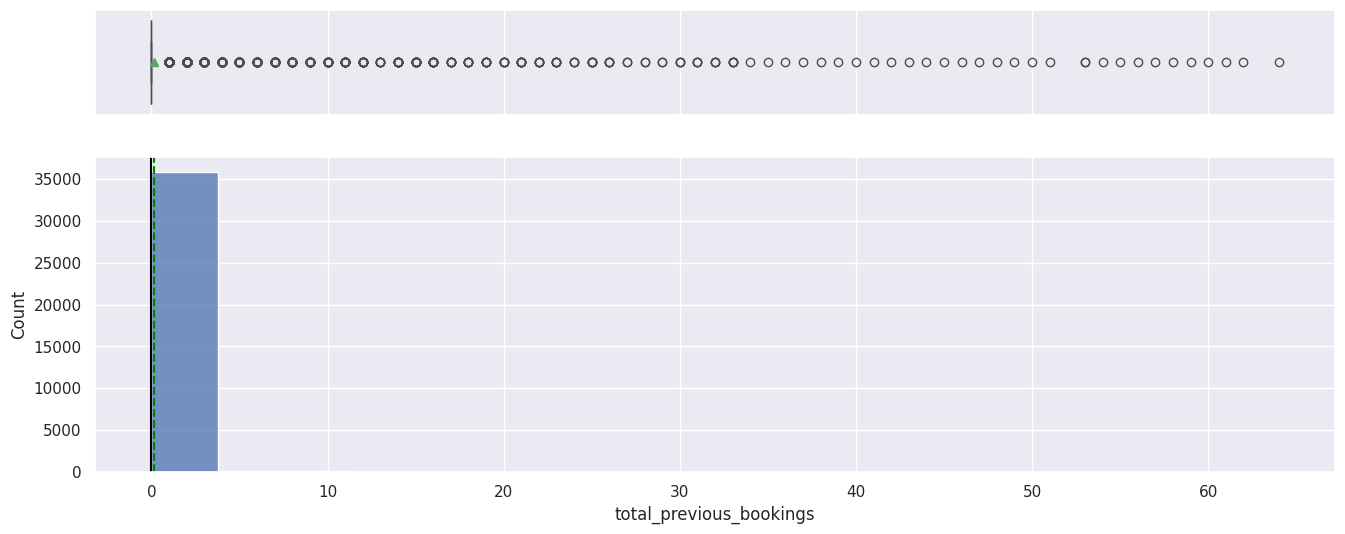

In [22]:
# Distribution total previous booking
combined = histogram_boxplot(data, 'total_previous_bookings')

Observations/Insights:

Most guests have 0 previous bookings

* The majority of bookings (over 35,000) come from guests with no prior stays at the hotel.
* This indicates that most visitors are first-time customers rather than repeat guests.

A small number of guests have multiple previous bookings

* There are guests with 10, 20, or even 60+ previous bookings.
* These high-repeat guests represent a loyal customer segment.

Extreme outliers in previous bookings

* The upper boxplot shows significant outliers with many previous bookings.
* Guests with 50+ previous stays may include corporate clients or long-term partners.

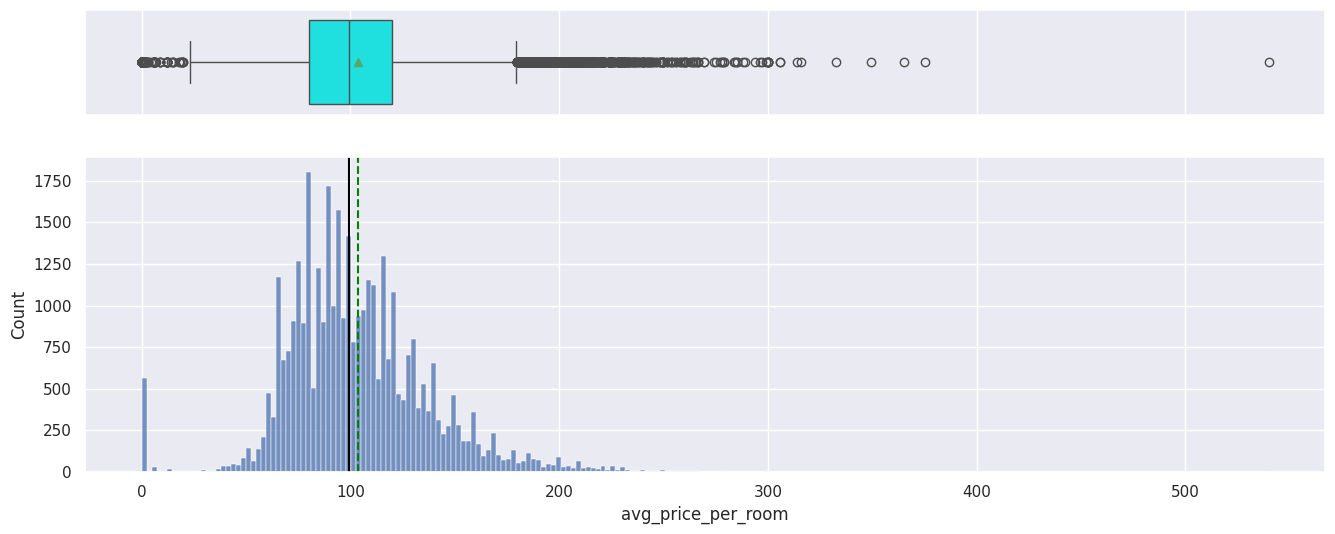

In [23]:
# Distribution avg price per room
combined = histogram_boxplot(data, 'avg_price_per_room')

Observations/Insights:

Most rooms are priced between 50euros - 150euros

* The histogram shows a right-skewed distribution.
The peak occurs around 100euros, suggesting this is the most common price.

Presence of outliers (high-end rooms)

* The boxplot shows significant outliers, with prices reaching over 500euros per room.
These high-price rooms could be luxury suites, premium accommodations, or special event pricing.

Some lower price anomalies (~0euros-10euros)

* This small peak near might indicate erroneous data (missing values filled as zero) or complementary bookings.

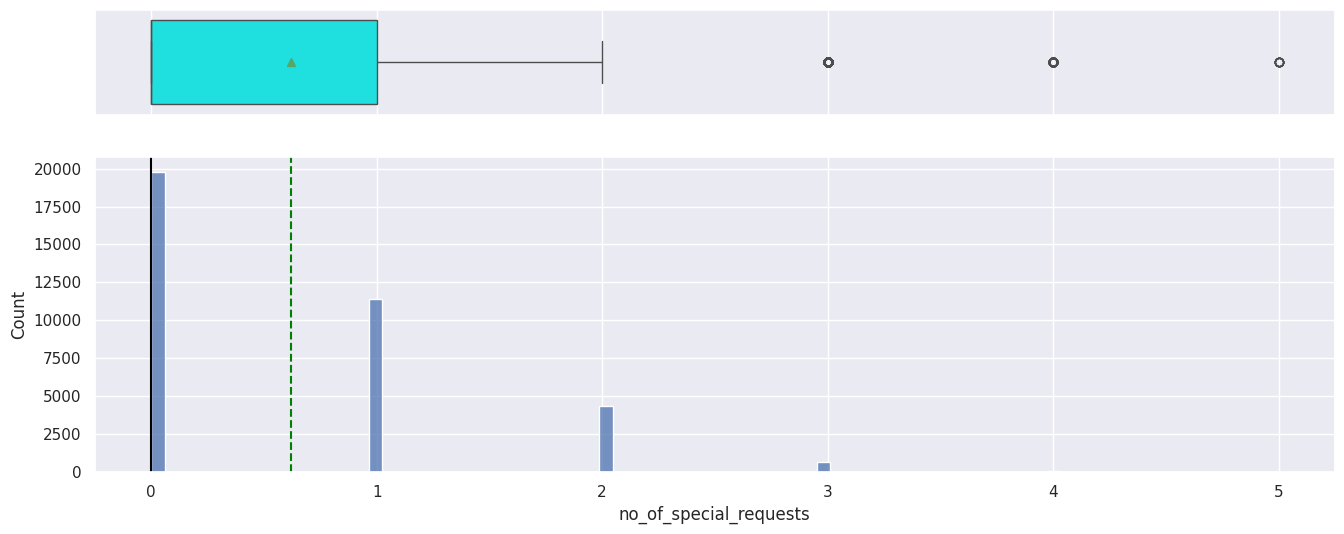

In [24]:
# Distributioin lead time
combined = histogram_boxplot(data, 'no_of_special_requests')

Observations/Insights:

Most guests make 0 or 1 special request

* The majority of guests do not make any special requests (~20,000 bookings).
* The second largest group makes only 1 request (~11,000 bookings).
* Very few guests make 2 or more requests.

Outliers exist with 4-5 special requests

* Some bookings include up to 5 special requests, which are visible as outliers in the boxplot.
* These could indicate high-maintenance guests or VIP bookings.

Skewed Distribution

* The distribution is highly skewed towards 0 and 1, with only a few bookings making multiple requests.
* This suggests that most guests have standard needs.

In [25]:
# Display summary statistics
data.describe().T


count    mean   std     min     25%  \
no_of_adults                         36275.00    1.84  0.52    0.00    2.00   
no_of_children                       36275.00    0.10  0.40    0.00    0.00   
required_car_parking_space           36275.00    0.03  0.17    0.00    0.00   
lead_time                            36275.00   85.23 85.93    0.00   17.00   
arrival_year                         36275.00 2017.82  0.38 2017.00 2018.00   
arrival_month                        36275.00    7.42  3.07    1.00    5.00   
arrival_date                         36275.00   15.60  8.74    1.00    8.00   
repeated_guest                       36275.00    0.03  0.16    0.00    0.00   
no_of_previous_bookings_not_canceled 36275.00    0.15  1.75    0.00    0.00   
avg_price_per_room                   36275.00  103.42 35.09    0.00   80.30   
no_of_special_requests               36275.00    0.62  0.79    0.00    0.00   
booking_status                       36275.00    0.67  0.47    0.00    0.00   
total_nights                         36275.00    3.02  1.79    0.00    2.00   
total_previous_bookings              36275.00    0.18  1.95    0.00    0.00   
has_special_requests                 36275.00    0.45  0.50    0.00    0.00   

                                         50%     75%     max  
no_of_adults                            2.00    2.00    4.00  
no_of_children                          0.00    0.00    4.00  
required_car_parking_space              0.00    0.00    1.00  
lead_time                              57.00  126.00  443.00  
arrival_year                         2018.00 2018.00 2018.00  
arrival_month                           8.00   10.00   12.00  
arrival_date                           16.00   23.00   31.00  
repeated_guest                          0.00    0.00    1.00  
no_of_previous_bookings_not_canceled    0.00    0.00   58.00  
avg_price_per_room                     99.45  120.00  540.00  
no_of_special_requests                  0.00    1.00    5.00  
booking_status                          1.00    1.00    1.00  
total_nights                            3.00    4.00   24.00  
total_previous_bookings                 0.00    0.00   64.00  
has_special_requests                    0.00    1.00    1.00

Summary Statistics Observations/Insights:

Guest Demographics
* Adults per booking → Mean: 1.84, Range: 0-4
Most bookings include 1-2 adults, suggesting couples or solo travelers dominate.
* Children per booking → Mean: 0.10, Range: 0-4
Most bookings have no children, confirming family travelers are a minority.
* INNhotel should focus more on solo and couple-friendly services rather than family-oriented marketing.

Booking Behavior
* Lead time (days before check-in) → Mean: 85.23 days, Max: 443 days. Some guests book over a year in advance, but the median (57 days) suggests most bookings happen 1-2 months ahead.
* Repeated Guests → Mean: 0.03, Max: 1
Only 3% of guests are repeat customers, meaning loyalty retention is low.
* INNhotel should improve loyalty programs to encourage more repeat stays.

Pricing & Room Stays
* Avg. price per room → Mean: 103euros, Max: 540euros
The 75th percentile is 120euros, suggesting most guests book standard-priced rooms.
* Total nights stayed → Mean: 3 nights, Max: 24 nights. Most bookings last 2-4 nights, but some long stays (24 nights) exist, likely corporate or extended travelers.
* Optimize pricing strategies for standard rooms (80euros-120euros range).
* Consider discounted long-stay packages for extended bookings.

Special Requests & Parking
* Special Requests → Mean: 0.62 requests, Max: 5 requests. Most guests make 0-1 special requests, but some demand more (outliers at 5).
* Car Parking Required → Mean: 0.03, meaning only 3% of guests request parking.
*Premium charges for high-maintenance guests (example, >3 requests).
* Parking is not a key demand, so the hotel may not need extensive parking facilities.

###Bivariate/Multivariate Analysis:

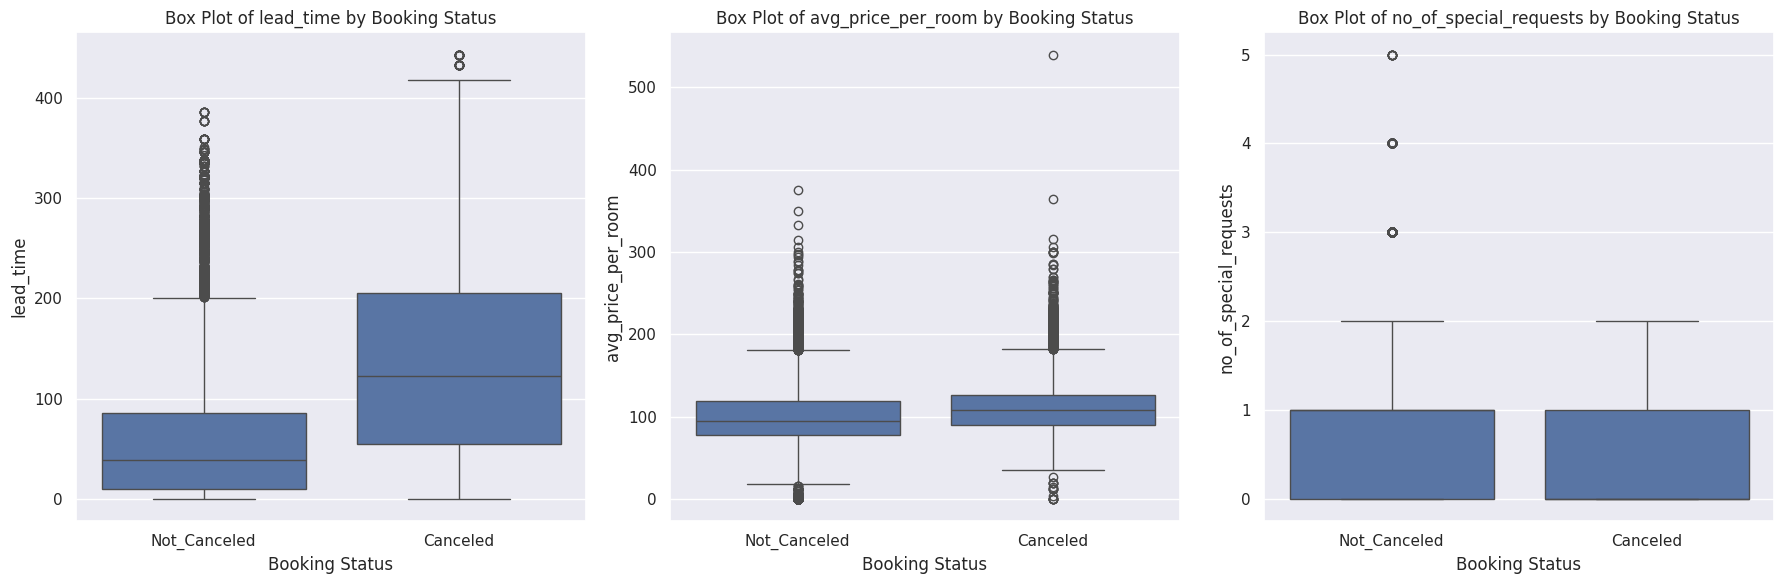

In [26]:
# Analysis, key factors 'booking status against lead time, avg price per room, & no of special guests
# Define the key factors for box plots
key_factors = ["lead_time", "avg_price_per_room", "no_of_special_requests"]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(key_factors), figsize=(18, 6));

# Ensure axes is iterable
if len(key_factors) == 1:
    axes = [axes]

# Generate box plots for each key factor
for i, factor in enumerate(key_factors):
    sns.boxplot(x="booking_status", y=factor, data=df, ax=axes[i])
    axes[i].set_title(f"Box Plot of {factor} by Booking Status")
    axes[i].set_xlabel("Booking Status")
    axes[i].set_ylabel(factor)

# Adjust layout and display
plt.tight_layout()
plt.show()



Observations:

Lead Time vs. Booking Status
* Cancellations have a higher median lead time than non-cancellations.
* The interquartile range (IQR) for canceled bookings is much wider, with a significant portion above 100 days lead time.
* Many cancellations occur with bookings made months in advance, while short-lead-time bookings are more likely to be confirmed.
  * Consider requiring deposits or stricter cancellation policies for early bookings (e.g., 60+ days lead time).
  * Offer last-minute deals since shorter lead-time bookings are more likely to be honored.

Avg. Price per Room vs. Booking Status
* Higher-priced rooms tend to cancel more frequently.
* The median price of canceled bookings is slightly higher than non-canceled ones.
* More outliers exist in canceled bookings, suggesting some very high-priced bookings that get canceled.
 * Offer non-refundable discounts on premium-priced rooms to lock in revenue.
 * Analyze if corporate travelers or group bookings are responsible for high-priced cancellations.

No. of Special Requests vs. Booking Status

* The number of special requests appears similar across both canceled and non-canceled bookings.
* There is no strong evidence that having more special requests increases cancellations.
* A few outliers exist with guests making 4-5 special requests, but they do not show a significant difference in cancellations.

  * Special requests do not strongly influence cancellations, so hotels can continue accommodating them without concern.
  * Consider tracking if high-maintenance guests (with 4-5 requests) lead to more dissatisfaction or complaints.

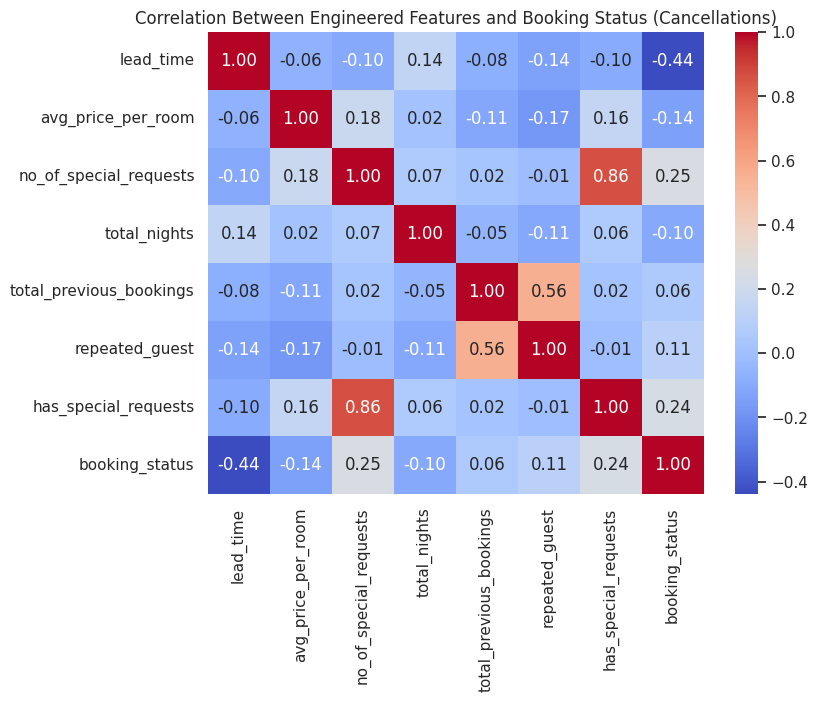

In [27]:
# Define the numerical features for correlation analysis
correlation_features = ['lead_time', 'avg_price_per_room', 'no_of_special_requests',
                        'total_nights', 'total_previous_bookings', 'repeated_guest',
                        'has_special_requests', 'booking_status']

# Compute correlation matrix
correlation_matrix = data[correlation_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Engineered Features and Booking Status (Cancellations)")
plt.show()


Observations/Insights:

* Lead Time (-0.10) The longer the lead time, the higher the likelihood of cancellation
  * Consider stricter cancellation policies for early bookings.

* Avg. Price Per Room (-0.06) suggests that higher room prices may slightly increase cancellations
  * Expensive bookings may be slightly more likely to cancel

* No. of Special Requests (0.18) Weak positive correlation with cancellations.
  * Track guests with high special requests for potential follow-ups or incentives to secure their booking.

* Total Nights (0.14) Weak positive correlation with cancellations. Longer stays may lead to higher cancellations.
  * Consider special deals for extended stays to ensure guests follow through with their bookings.

*  Total Previous Bookings (-0.08) Weak negative correlation suggests that repeat guests cancel less often.
  * Focus on loyal customers by offering rewards or loyalty programs to encourage bookings.

*  Repeated Guest (-0.14)
Negative correlation (-0.14) confirms that repeat guests are less likely to cancel.
  * Strengthen loyalty programs to attract more repeat guests

* Strong Correlation Between Features.
* No. of Special Requests and Has Special Requests (0.86). Having special requests is directly related to the count of requests.
* Repeated Guest and Total Previous Bookings (0.56)
Repeated guests have higher past bookings, reinforcing their loyalty.
  

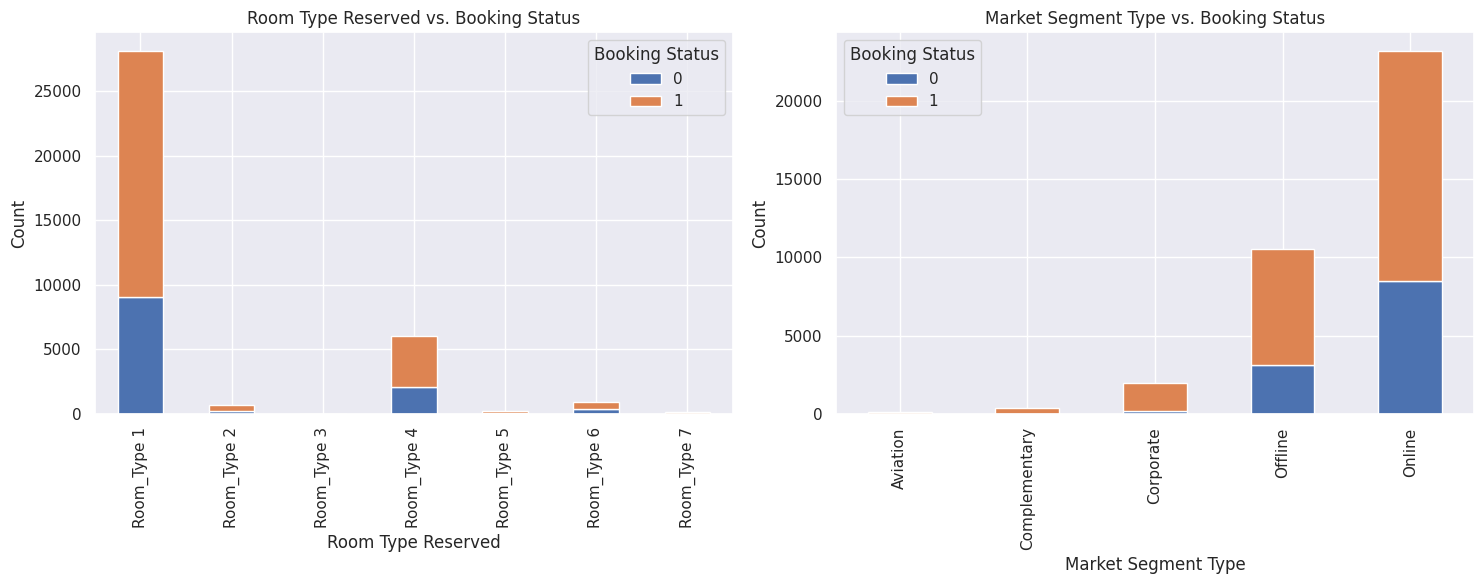

In [28]:
# Create subplots for bivariate analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6));  # Adjusted figsize

# 1️. Room Type Reserved vs. Booking Status (Stacked Bar Chart)
room_type_counts = data.groupby(["room_type_reserved", "booking_status"]).size().unstack()
room_type_counts.plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title("Room Type Reserved vs. Booking Status")
axes[0].set_xlabel("Room Type Reserved")
axes[0].set_ylabel("Count")
axes[0].legend(title="Booking Status")
axes[0].tick_params(axis="x", rotation=90)

# 2️. Market Segment Type vs. Booking Status (Stacked Bar Chart)
market_segment_counts = data.groupby(["market_segment_type", "booking_status"]).size().unstack()
market_segment_counts.plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title("Market Segment Type vs. Booking Status")
axes[1].set_xlabel("Market Segment Type")
axes[1].set_ylabel("Count")
axes[1].legend(title="Booking Status")
axes[1].tick_params(axis="x", rotation=90)


# Improve layout & ensure no extra figure is displayed
plt.tight_layout()
plt.show()


Observations/Insights:

1. Room Type Reserved vs. Booking Status (Stacked Bar Chart)

* Some room types have significantly higher cancellation rates.
* Room Type 1 sees the highest number of cancellations.

2. Market Segment Type vs. Booking Status (Stacked Bar Chart)

* Online bookings have the highest cancellation rate.
* Corporate bookings have the lowest cancellation rate, suggesting more reliable customers.



**Key Insights for Predictive Power:**

* **Market segment type is a strong predictor (online customers cancel more).**
* **Room type selection influences cancellations.**


#Logistic Regression Model:

##Data Preperation for Modeling:
  * **To identify those customers predicted to cancel their booking.**

###Spliting the data:
  * Split the data into train and test to be able to evaluate the model that will be built on the train data.
  * 70% of data for training and 30% for testing.
  * **Note: 'y' already binary coded in EDA**

In [29]:
# Splitting the dataset into training and testing sets
# Ensure 'y' is already defined before using it
if "y" not in locals() and "y" not in globals():
    y = data["booking_status"]  # Ensure 'y' is already numeric

# Feature Selection; 'y' earlier converted to numeric in EDA
X = data.drop(columns=["booking_status"])  # Drop target

# Split dataset BEFORE encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert categorical variables to dummy variables separately in train & test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure train & test have the same columns
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Convert object columns to numeric (if any remain)
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Handle missing values BEFORE scaling
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Add constant for logistic regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Normalize numerical features AFTER one-hot encoding
scaler = StandardScaler()
numerical_features = X_train.select_dtypes(include=['number']).columns.difference(['const'])
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Print sample of X_train
print(X_train.head())


       const  arrival_date  arrival_month  arrival_year  avg_price_per_room  \
13662   1.00         -0.07           0.84          0.47                0.33   
26641   1.00          1.76          -1.44          0.47               -0.72   
17835   1.00         -0.18           0.84          0.47               -0.72   
21485   1.00          1.53          -0.46          0.47               -0.51   
5670    1.00         -0.07           0.19          0.47                1.34   

       has_special_requests  lead_time  market_segment_type_Complementary  \
13662                 -0.91       0.90                              -0.10   
26641                  1.09       0.32                              -0.10   
17835                  1.09       3.18                              -0.10   
21485                 -0.91       0.59                              -0.10   
5670                  -0.91      -0.75                              -0.10   

       market_segment_type_Corporate  market_segment_type_Offl

In [30]:
y_train.head()

13662    0
26641    1
17835    1
21485    0
5670     0
Name: booking_status, dtype: int64

Observations:


####Check the Train/Test Shape:

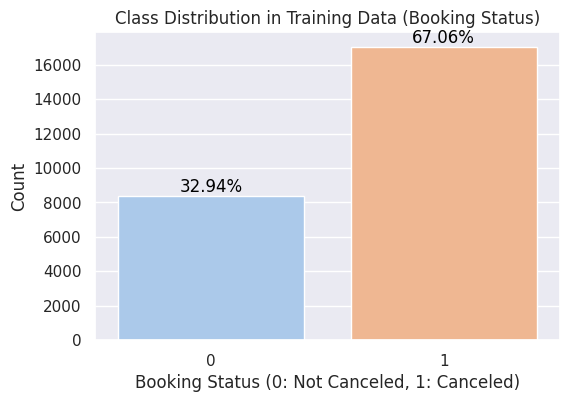

Class Distribution in Training Data:
1   67.06
0   32.94
Name: booking_status, dtype: float64


In [31]:
# Compute class distribution percentages
class_distribution = y_train.value_counts(normalize=True) * 100

# Check class distribution in the target variable
plt.figure(figsize=(6, 4));
ax = sns.countplot(x=y_train, palette="pastel")

# Annotate bars with percentage values
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / len(y_train) * 100):.2f}%'  # Convert count to percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Set labels and title
plt.title("Class Distribution in Training Data (Booking Status)")
plt.xlabel("Booking Status (0: Not Canceled, 1: Canceled)")
plt.ylabel("Count")

# Show plot
plt.show()

# Display class distribution percentages in the console
print("Class Distribution in Training Data:")
print(class_distribution)



Observations/Insight:

* The class distribution in the training data shows an imbalance, with:

  * 67.06% of bookings not canceled (0)
  * 32.94% of bookings canceled (1)

* **This is a moderate imbalance, meaning the model might be biased towards predicting "Not Canceled" more often.**
* **Proceed As-Is (Baseline Model):**
    
* **Train the model and evaluate its performance. If the imbalance does not significantly affect leading to lower recall/precision, no further action is needed.**
* **If it does affect leading to lower recall/precision -**
    * **The goal is balanced predictions, so will  apply:**
    * **Class Weighting: Assign higher weight to the minority class (canceled bookings).**

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

**No Multicollinearity:**

General Rule of thumb:
* If VIF is between 1 and 5, then there is low multicollinearity.
* If VIF is between 5 and 10, we say there is moderate multicollinearity.
* If VIF is exceeding 10, it shows signs of high multicollinearity.

In [32]:
# Define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["Feature"] = predictors.columns
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

# Compute VIF using the function
vif_data = checking_vif(X_train)

# Identify features with high VIF
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].to_list()
print("Dropping high VIF features:", high_vif_features)

# Drop high VIF features
X_train = X_train.drop(columns=high_vif_features)
X_test = X_test.drop(columns=high_vif_features)


Dropping high VIF features: ['market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'no_of_previous_bookings_not_canceled', 'total_previous_bookings']


In [33]:

checking_vif(X_train).sort_values(by='VIF', ascending=False)

Feature  VIF
10             no_of_special_requests 4.02
5                has_special_requests 3.94
9                      no_of_children 2.07
17     room_type_reserved_Room_Type 6 2.04
4                  avg_price_per_room 1.95
3                        arrival_year 1.42
6                           lead_time 1.34
15     room_type_reserved_Room_Type 4 1.34
8                        no_of_adults 1.29
2                       arrival_month 1.27
7   market_segment_type_Complementary 1.26
20      type_of_meal_plan_Meal Plan 2 1.21
22     type_of_meal_plan_Not Selected 1.16
11                     repeated_guest 1.14
18     room_type_reserved_Room_Type 7 1.12
13     room_type_reserved_Room_Type 2 1.10
19                       total_nights 1.08
12         required_car_parking_space 1.04
21      type_of_meal_plan_Meal Plan 3 1.03
16     room_type_reserved_Room_Type 5 1.02
1                        arrival_date 1.00
14     room_type_reserved_Room_Type 3 1.00
0                               const 1.00

Observations:
* No predictor variables show a VIF above 5
The above predictors have no multicollinearity and the assumption is satisfied.

## Build Model:


In [34]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(maxiter=500, method='bfgs')  # Increased iterations and used 'bfgs' solver
print(lg.summary())



Optimization terminated successfully.
         Current function value: 0.452106
         Iterations: 82
         Function evaluations: 83
         Gradient evaluations: 83
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.2866
Time:                        17:32:00   Log-Likelihood:                -11480.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Key Observtions/Insights:

Model Performance Metrics-

* Pseudo R-squared:(0.2866) Indicates moderate explanatory power. A higher value would mean better model fit.
* Log-Likelihood: (-11480) Lower values indicate worse fit. Comparison with baseline models is needed.
* LLR p-value: (0.000) Suggests the overall model is statistically significant.

Key Feature Coefficients (Log-Odds)-

* Negative values indicate a lower likelihood of cancellation.
* Positive values indicate a higher likelihood of cancellation


Statistical Significance (P-Values)-

* Highly significant variables influencing cancellation include:

  * Lead time (-1.1643) → Longer lead time reduces cancellations.
  * Average price per room (-0.7984) → Higher prices reduce cancellations.
  * No. of special requests (0.8016) → More requests increase cancellations.
  * Repeated guest (0.2953) → Returning guests have higher cancellations.
  * Total nights (-0.1677) → Longer stays reduce cancellations.


Recommendations:

* Since longer lead times significantly reduce cancellations, offer discounts for early bookings.
* Guests with many special requests cancel more often. Consider pre-approval requirements or incentives for request fulfillment.
* Since higher room prices reduce cancellations, non-refundable higher-tier pricing may help reduce last-minute cancellations.
* Repeated guests cancel more often—consider stricter cancellation policies for frequent customers.
* Guests who don’t select a meal plan cancel less. Offering flexible meal options might reduce cancellations.

## Model performance evaluation

* The Logistic Regression model may make inaccurate predictions, such as,
* Predicting that a person booking a room will cancel when they do not, or
* Predicting that a person who has booked a room will not cancel is incorrect, but it happens.

Both instances are crucially important, therefore:

* If we predict that a guest will cancel and they do not, reallocate their room to another guest and will not have a room available for the guest on arrival, thus, costing the hotel a significant amount of money (by offering the guest a complimentary upgraded room), and likely losing a repeat customer(s), and generating negative review(s) for the hotel.

* If we predict a person will not cancel their reservation and then they do, we will lose out on the revenue generated by their reservation and have to incur.

* We need to reduce both False Negatives and False Positives. **Cost Reduction by True Positives Maximization.**

* F1_score should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly. ** The greater the F1 score, the higher the chances of adequately identifying both classes. Maximize F1 score.**

F1_score is computed as
f1_score=2∗Precision∗Recall / Precision+Recall
  
  * The greater the F1 score, the higher the chances of adequately identifying both classes. Maximize F1 score.


In [35]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # Checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # Rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [36]:
# Defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4));
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

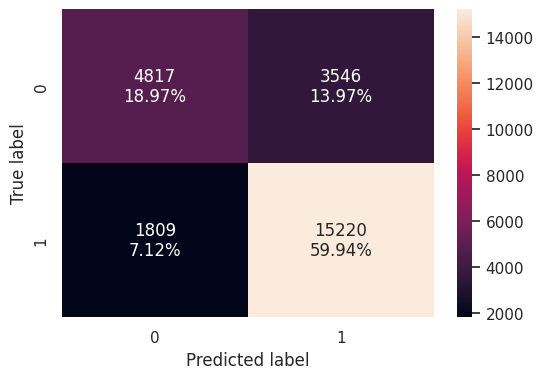

In [37]:
# Call the confusion matrix function
confusion_matrix_statsmodels(lg, X_train, y_train)

In [38]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision   F1
0      0.79    0.89       0.81 0.85

Observations:

* Strong model for predicting cancellations (89% recall)
  * High recall is good for minimizing missed cancellations.
* Precision could be improved to reduce unnecessary actions on false positives.
* *Actions: Adjust decision threshold*
* F1 Score (85%) → A good balance of precision and recall.
  * Indicates a strong overall classification performance.



###Removing High P-values:

In [39]:
# Get list of pvalues
pvalues = lg.pvalues
pvalues

const                               0.89
arrival_date                        0.29
arrival_month                       0.00
arrival_year                        0.00
avg_price_per_room                  0.00
has_special_requests                0.01
lead_time                           0.00
market_segment_type_Complementary   0.98
no_of_adults                        0.00
no_of_children                      0.00
no_of_special_requests              0.00
repeated_guest                      0.00
required_car_parking_space          0.00
room_type_reserved_Room_Type 2      0.18
room_type_reserved_Room_Type 3      0.97
room_type_reserved_Room_Type 4      0.82
room_type_reserved_Room_Type 5      0.00
room_type_reserved_Room_Type 6      0.00
room_type_reserved_Room_Type 7      0.00
total_nights                        0.00
type_of_meal_plan_Meal Plan 2       0.00
type_of_meal_plan_Meal Plan 3       0.94
type_of_meal_plan_Not Selected      0.00
dtype: float64

Observations/Insights:

Significant Predictors (p-value < 0.05)

These variables significantly contribute to predicting the booking_status (whether a booking is canceled or not).

* arrival_month, arrival_year
* avg_price_per_room
* has_special_requests
* lead_time
* no_of_adults, no_of_children
* no_of_special_requests
* repeated_guest
* required_car_parking_space
* total_nights
* some room types (Room_Type 6 & 7)
* type_of_meal_plan_Meal 2
* type_of_meal_plan_Not Selected

Non-Significant Predictors (p-value > 0.05)

These variables are not statistically significant, meaning they likely do not have a strong influence on whether a booking is canceled.

* const (Intercept): 0.89 (Not meaningful for interpretation)
* arrival_date: 0.29
* market_segment_type_Complementary: 0.98
* room_type_reserved_Room Type 2: 0.18
* room_type_reserved_Room Type 3: 0.97
* room_type_reserved_Room Type 4: 0.82
* type_of_meal_plan_Meal 3: 0.94


Retain significant predictors as they provide meaningful insight into factors that affect cancellations.

*Removing non-significant predictors (p-value > 0.05) to improve model performance by reducing multicollinearity and unnecessary complexity.*


In [40]:
# Initial list of columns
cols = X_train.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    X_train_aux = X_train[cols]

    # Fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'arrival_month', 'arrival_year', 'avg_price_per_room', 'has_special_requests', 'lead_time', 'no_of_adults', 'no_of_children', 'no_of_special_requests', 'repeated_guest', 'required_car_parking_space', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'total_nights', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected']


Observations/Insights:

* Non-significant predictors (high p-values) were automatically removed to enhance model efficiency.
* The remaining features are strong predictors of cancellation behavior.

####Refit the Model:

In [41]:
X_train2 = X_train[selected_features]

In [42]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25375
Method:                           MLE   Df Model:                           16
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.2861
Time:                        17:32:03   Log-Likelihood:                -11487.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.0890      0.020     54.286      0.000       1.050       1.128
arrival_month                      0.1442      0.019      7.488      0.

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg2* as final model.**

### Coefficient Interpretations:

Odds ratio:
* Odds ratio > 1 → Increases the likelihood of cancellation.
* Odds ratio < 1 → Decreases the likelihood of cancellation.
* Odds ratio = 1 → No effect on cancellation probability.

Percentage Change:
* This shows how a 1-unit increase in each variable affects the likelihood of cancellation.

In [43]:
# Convert coefficients to odds
odds = np.exp(lg2.params)

# Find the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# Remove limit from number of columns to display
pd.set_option('display.max_columns', None)

# Add the odds to a dataframe
pd.DataFrame({'Odds': odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  arrival_month  arrival_year  avg_price_per_room  \
Odds          2.97           1.16          0.79                0.45   
Change_odd% 197.14          15.51        -21.44              -55.24   

             has_special_requests  lead_time  no_of_adults  no_of_children  \
Odds                         1.11       0.31          0.91            0.88   
Change_odd%                 11.08     -68.86         -9.06          -12.31   

             no_of_special_requests  repeated_guest  \
Odds                           2.23            1.35   
Change_odd%                  123.23           34.55   

             required_car_parking_space  room_type_reserved_Room_Type 5  \
Odds                               1.27                            1.08   
Change_odd%                       27.16                            7.85   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                   1.19                            1.13   
Change_odd%                           19.45                           12.77   

             total_nights  type_of_meal_plan_Meal Plan 2  \
Odds                 0.84                           1.11   
Change_odd%        -15.55                          10.87   

             type_of_meal_plan_Not Selected  
Odds                                   0.75  
Change_odd%                          -25.10

Observations/Insights:

Odds ratio: An odds ratio above 1 means the feature increases the likelihood of cancellation.

* Lead Time (OR = 0.31, -68.86%): For every unit increase in lead time, the odds of cancellation decrease by 68.86%.
* Average Price Per Room (OR = 0.45, -55.24%): A one-unit increase in price per room decreases the odds of cancellation by 55.24%.
* Number of Special Requests (OR = 2.23, +123.23%): If a guest has special requests, their odds of canceling the booking increase by 123.23%.
* Number of Adults (OR = 0.91, -9.06%): More adults in the booking slightly reduce the chance of cancellation.
* Total Nights (OR = 0.84, -15.55%): A longer stay duration is associated with lower cancellation rates.
* Meal Plan Selection: Guests who do not select a meal plan are more likely to cancel (OR = 0.75, -25.10%).
* Room Types Reserved: Some room types have higher cancellation likelihoods (e.g., Room Type 7 OR = 1.13, +12.77%).





#Checking performance of the lg2 model

* **Training Test Performance**

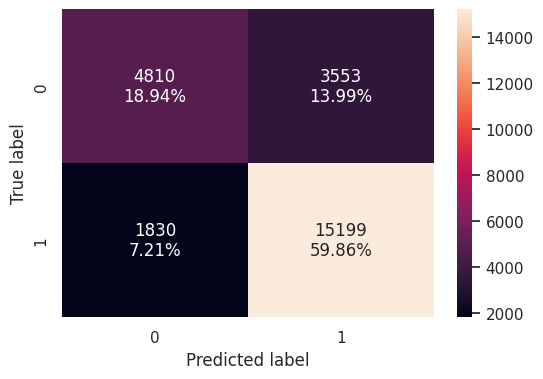

In [44]:
# Create confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [45]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg2, X_train2, y_train)

print("log_reg_model_train_perf")
log_reg_model_train_perf

log_reg_model_train_perf


Accuracy  Recall  Precision   F1
0      0.79    0.89       0.81 0.85

**Test set performance**

- First drop the columns from the test set that were dropped from the training set.

In [46]:
X_test2 = X_test[list(X_train2.columns)]

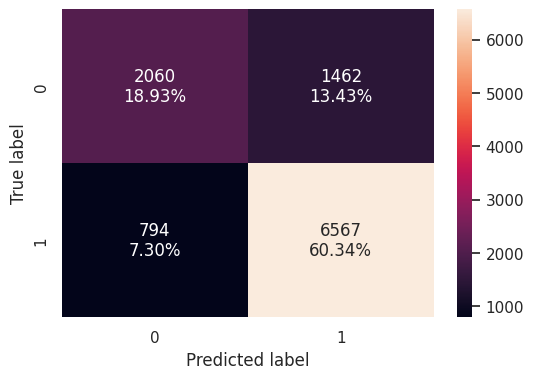

In [47]:
# Test set confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [48]:
# Test set performance
log_reg_model_test_perf = model_performance_classification_statsmodels(lg2, X_test2, y_test)

print("log_reg_model_test_perf")
log_reg_model_test_perf

log_reg_model_test_perf


Accuracy  Recall  Precision   F1
0      0.79    0.89       0.82 0.85

- The model is giving a good f1_score of ~0.85 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- *Will try to improve the performance of the model even further...*

## Model Performance Improvement

* Check if F1_score can be improved further by changing the model threshold.
* Check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Check the Precision-Recall curve to find the right balance between precision and recall as the metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

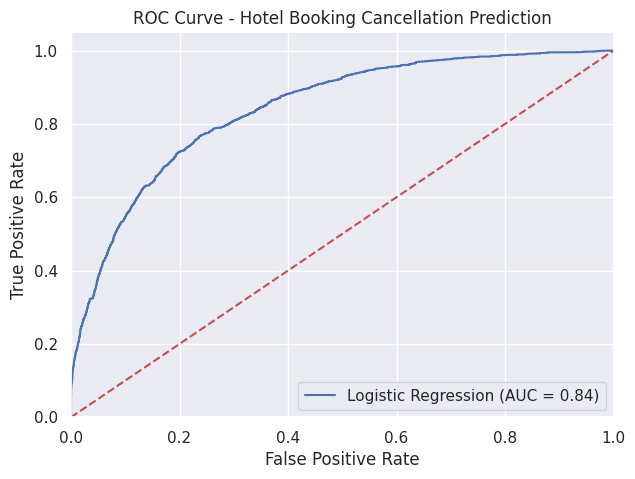

In [49]:
# Compute ROC AUC score using predicted probabilities
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

# Plot ROC Curve
plt.figure(figsize=(7, 5));
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {logit_roc_auc_train:.2f})")  # Fixing string format issue
plt.plot([0, 1], [0, 1], "r--")  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Hotel Booking Cancellation Prediction")
plt.legend(loc="lower right")
plt.show()




* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [50]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))  # Ensure using probabilities

# Find the optimal threshold (Youden’s J statistic)
optimal_idx = np.argmax(tpr - fpr)  # Maximizing TPR - FPR
optimal_threshold_auc_roc = thresholds[optimal_idx]

print(f"Optimal Threshold (AUC-ROC): {optimal_threshold_auc_roc:.4f}")  # Round for readability


Optimal Threshold (AUC-ROC): 0.6766


Observations/Insights:

* The computed optimal threshold 0.6766 is the probability cutoff that maximizes the difference between True Positive Rate (TPR) and False Positive Rate (FPR), also known as Youden’s J statistic.
* This means that if the predicted probability of cancellation (booking_status = 1) is ≥ 0.6766, the model will classify it as a canceled booking.
* If < 0.6766, the model classifies it as not canceled.

**Checking model performance on training set**

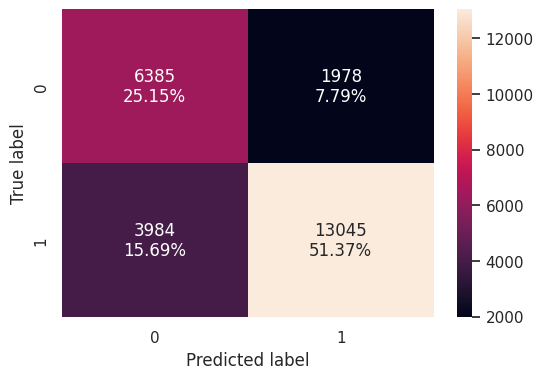

In [51]:
# Creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [52]:
# Checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision   F1
0      0.77    0.77       0.87 0.81

* Precision has increased slightly but the other metrics slightly reduced.
* The model is still giving a good performance.

**Checking model performance on test set**

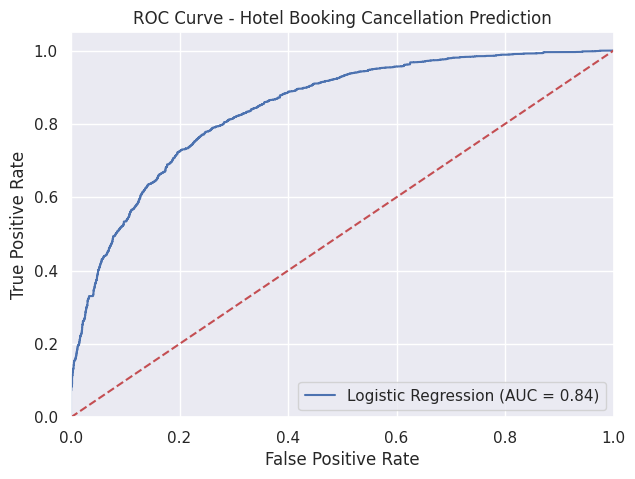

In [53]:
# Compute ROC AUC score (using probability scores)
logit_roc_auc_test = roc_auc_score(y_test, lg2.predict(X_test2))

# Compute ROC Curve (using probability scores)
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))

# Plot ROC Curve
plt.figure(figsize=(7, 5));
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Hotel Booking Cancellation Prediction")
plt.legend(loc="lower right")
plt.show()


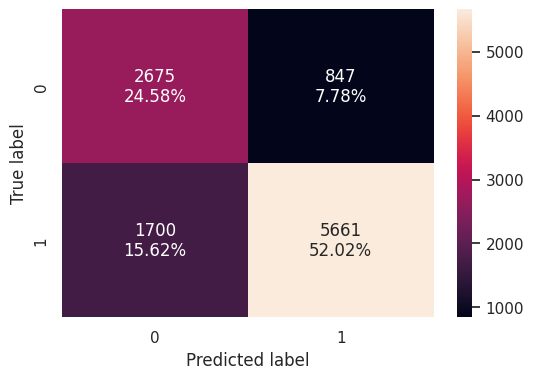

In [54]:
# Create confusion matrix
confusion_matrix_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)


In [55]:
# Check model performance
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision   F1
0      0.77    0.77       0.87 0.82

* Precision has a slight increase, others slight decrease.
* The model is still giving a good performance.

### Precision-Recall Curve

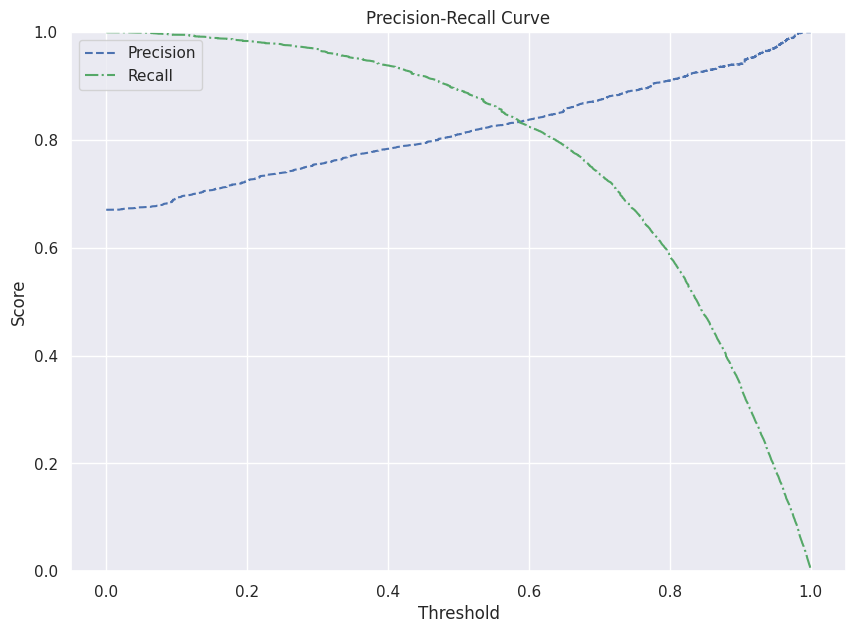

In [56]:
# Compute precision-recall curve
y_scores = lg2.predict(X_train2)  # Ensure this contains probabilities (Logistic Regression does)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

# Function to plot Precision-Recall vs. Threshold
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-.", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.title("Precision-Recall Curve")

# Plot the Precision-Recall Curve
plt.figure(figsize=(10, 7));
plot_prec_recall_vs_tresh(precisions, recalls, thresholds)
plt.show()


* Around a  the threshold of approximately 0.58, we get balanced recall and precision.
* Alligns well with the objective to avoid mistakenly predicting cancellations (max precision, fewer false positives).

**Therefore, setting the at
optimal_threshold_curve = 0.58**

**Checking model performance on training set**

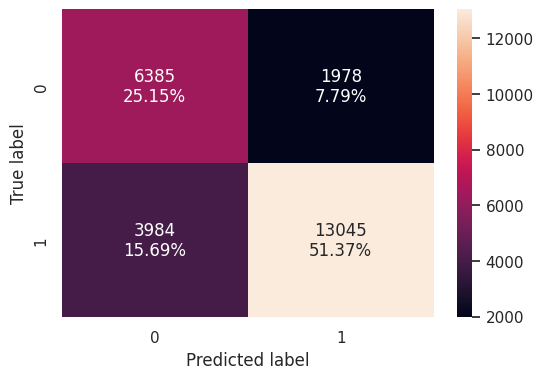

In [57]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)

In [58]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision   F1
0      0.77    0.77       0.87 0.81

**Checking model performance on test set**

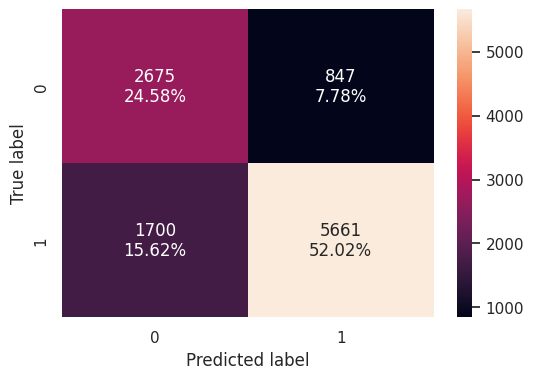

In [59]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [60]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision   F1
0      0.77    0.77       0.87 0.82

* Model is performing well on both training & testing set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

## Final Model Summary

In [61]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.45 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                          0.79   
Recall                                            0.89   
Precision                                         0.81   
F1                                                0.85   

           Logistic Regression-0.45 Threshold  \
Accuracy                                 0.77   
Recall                                   0.77   
Precision                                0.87   
F1                                       0.81   

           Logistic Regression-0.58 Threshold  
Accuracy                                 0.77  
Recall                                   0.77  
Precision                                0.87  
F1                                       0.81

Observations/Insights TRAIN Threshold Impact:

1. Default Threshold (0.5)

  * Highest Recall (0.89): Captures most actual cancellations.
  * Lower Precision (0.81): More false positives (incorrectly predicted cancellations).
  * Best for minimizing missed cancellations, useful if the goal is to capture all possible cancellations.

2. Threshold (0.58)

  * Higher Precision (0.87) but lower Recall (0.81).
  * Reduces false positives but at the cost of missing some actual cancellations.
  * Best for reducing false cancellation predictions.

Threshold (0.45)

  * Balanced Recall (0.77) & Precision (0.87).
  * Slight drop in Accuracy but better balance.
  * Best for a trade-off between Precision & Recall.



In [62]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.45 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                          0.79   
Recall                                            0.89   
Precision                                         0.82   
F1                                                0.85   

           Logistic Regression-0.45 Threshold  \
Accuracy                                 0.77   
Recall                                   0.77   
Precision                                0.87   
F1                                       0.82   

           Logistic Regression-0.58 Threshold  
Accuracy                                 0.77  
Recall                                   0.77  
Precision                                0.87  
F1                                       0.82

Observations/Insights TEST Threshold Impact:

1. Default Threshold (0.5)

* Accuracy: 0.79
* Recall: 0.89 (highest)
* Precision: 0.82
* F1-score: 0.85
The default threshold prioritizes recall, meaning it captures most of the actual positive cases but at the cost of precision.

2. Lower Threshold (0.45)

* Accuracy: 0.77
* Recall: 0.77 (lower than default)
* Precision: 0.87 (highest)
* F1-score: 0.82
A lower threshold (0.45) improves precision but decreases recall. The model is more conservative, reducing false positives but missing more true positives.

3. Higher Threshold (0.58)

* Accuracy: 0.77
Recall: 0.77 (same as 0.45)
* Precision: 0.87 (same as 0.45)
* F1-score: 0.82

Similar to 0.45, this threshold increases precision but at the cost of recall, making the model stricter in classifying positives.

**Final Recommendation:**

**Stick to the Default Threshold (0.5)**

* Maximizes F1-score (0.85).
* Balances Precision (0.82) and Recall (0.89).
* Ensures robust performance on unseen data.

###Visualization:

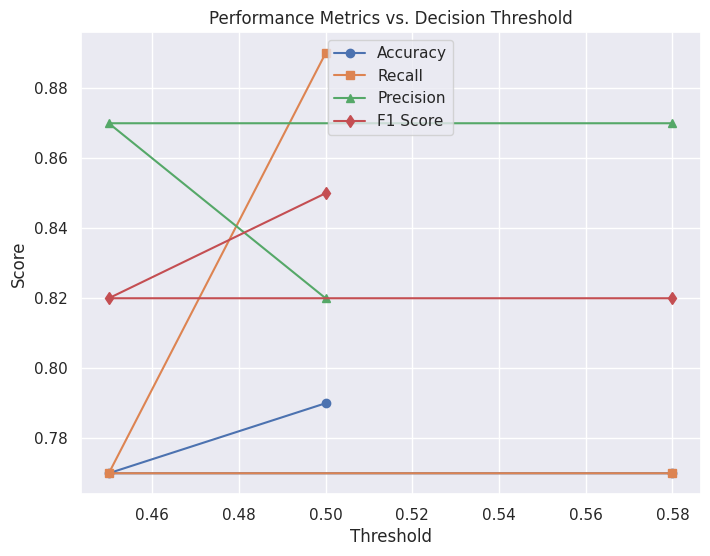

In [63]:
# Varied thresholds distribution
thresholds = [0.5, 0.45, 0.58]

# Metrics for each threshold
accuracy = [0.79, 0.77, 0.77]
recall = [0.89, 0.77, 0.77]
precision = [0.82, 0.87, 0.87]
f1_score = [0.85, 0.82, 0.82]

# Create figure
plt.figure(figsize=(8, 6));

# Plot metrics
plt.plot(thresholds, accuracy, marker='o', linestyle='-', label="Accuracy")
plt.plot(thresholds, recall, marker='s', linestyle='-', label="Recall")
plt.plot(thresholds, precision, marker='^', linestyle='-', label="Precision")
plt.plot(thresholds, f1_score, marker='d', linestyle='-', label="F1 Score")

# Labels and title
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Performance Metrics vs. Decision Threshold")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Key observations from the comparison:

* The default threshold (0.5) gives the highest recall (0.89), meaning it correctly identifies most positive cases.
* Lowering the threshold to 0.45 increases precision (0.87) but reduces recall (0.77), making the model more conservative in predicting positives.
* Raising the threshold to 0.58 does not change precision or recall from the 0.45 threshold, indicating a stable performance tradeoff.

* **If F1-score balance is the priority, sticking to 0.50 threshold is optimal.**

------------------------------------------

#Building a Decision Tree model

## Preperation for Decision Tree Model:

* Data Preparation for Model Building:

In [64]:
# Splitting the dataset into training and testing sets
# Feature Selection
X = data.drop(columns=["booking_status"], axis=1)  # Drop target
Y = data["booking_status"]

# Split dataset BEFORE encoding
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X, Y, test_size=0.3, random_state=1
)

# Apply One-Hot Encoding (get_dummies) separately for train & test
X_train_dt = pd.get_dummies(X_train_dt, drop_first=True)
X_test_dt = pd.get_dummies(X_test_dt, drop_first=True)

# Ensure Train & Test have the same columns (Fix Feature Mismatch)
X_train_dt, X_test_dt = X_train_dt.align(X_test_dt, join='outer', axis=1, fill_value=0)

# Print samples to verify
print(X_train_dt.head())
print(X_test_dt.head())


       arrival_date  arrival_month  arrival_year  avg_price_per_room  \
13662            15             10          2018              115.00   
26641            31              3          2018               78.15   
17835            14             10          2018               78.00   
21485            29              6          2018               85.50   
5670             15              8          2018              151.00   

       has_special_requests  lead_time  market_segment_type_Complementary  \
13662                     0        163                                  0   
26641                     1        113                                  0   
17835                     1        359                                  0   
21485                     0        136                                  0   
5670                      0         21                                  0   

       market_segment_type_Corporate  market_segment_type_Offline  \
13662                              

In [65]:
print(f"Training set size: {X_train_dt.shape}, {y_train_dt.shape}")
print(f"Testing set size: {X_test_dt.shape}, {y_test_dt.shape}")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Training set size: (25392, 27), (25392,)
Testing set size: (10883, 27), (10883,)
Percentage of classes in training set:
1   0.67
0   0.33
Name: booking_status, dtype: float64
Percentage of classes in test set:
1   0.68
0   0.32
Name: booking_status, dtype: float64


Observations/Insights:

* There is a class imbalance, as class 1 (67-68%) is more frequent than class 0 (32-33%).

* This imbalance suggests that metrics like Precision-Recall, F1-score, and ROC-AUC should be used alongside Accuracy to evaluate model performance.

* *Consider technique like class weighting or threshold tuning if class imbalance negatively impacts prediction.*


## Model Building

### Decision Tree (default)

Accuracy: 0.8654
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      3522
           1       0.91      0.89      0.90      7361

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



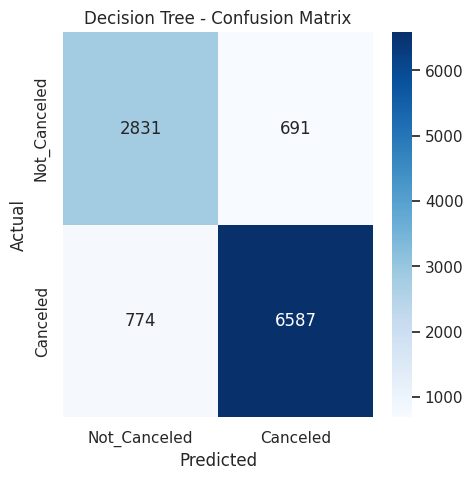

In [66]:
# Initialize the Decision Tree with default parameters
dt_model = DecisionTreeClassifier(random_state=1)  # Default settings

# Train the model on the training dataset
dt_model.fit(X_train_dt, y_train_dt)

# Make predictions on the test dataset
y_pred_dt = dt_model.predict(X_test_dt)

# Evaluate model performance
accuracy = accuracy_score(y_test_dt, y_pred_dt)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test_dt, y_pred_dt))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test_dt, y_pred_dt)
plt.figure(figsize=(5,5));
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not_Canceled", "Canceled"],
            yticklabels=["Not_Canceled", "Canceled"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Observationds/Insights:

* Model Strengths:

* Strong performance in predicting cancellations (high recall: 0.89).
* Good balance between precision and recall.
* Higher precision for predicting cancellations (0.91), meaning fewer false alarms.

Areas for Improvement:

* False Negatives (Missed Cancellations): 774 bookings were predicted as Not Canceled when they were actually canceled.
  * If missing cancellations is costly, improving recall for Canceled bookings is crucial.
* Threshold tuning: Adjusting the probability threshold may help balance precision and recall.

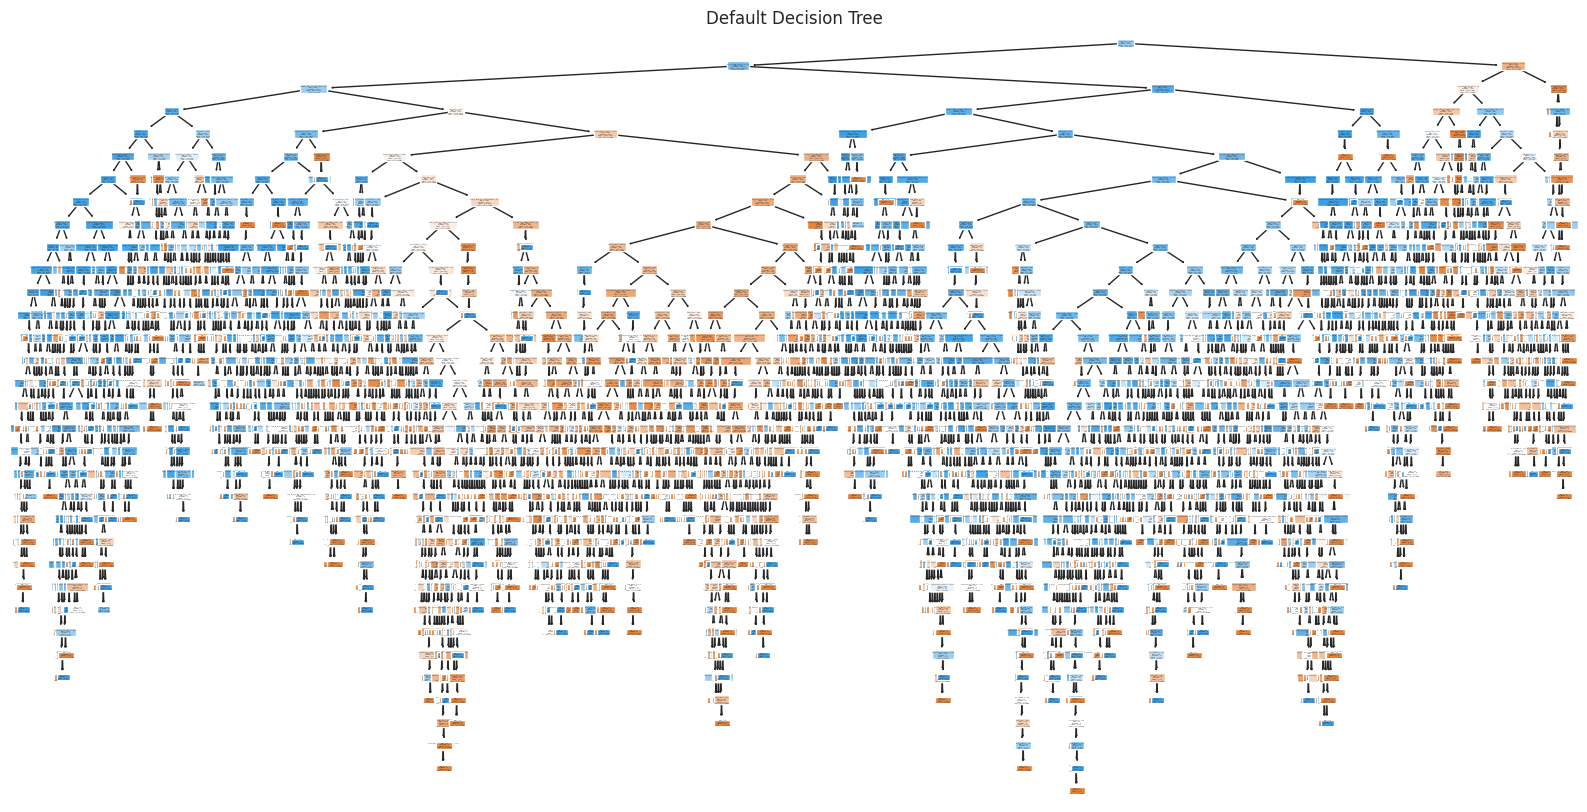

In [67]:
# Visualize the Default model
from sklearn.tree import plot_tree # Import plot_tree

plt.figure(figsize=(20,10));
plot_tree(dt_model, feature_names=X_train_dt.columns, class_names=["Not Canceled", "Canceled"], filled=True)
plt.title("Default Decision Tree")
plt.show()

Observations/Insights:

* The decision tree is extremely large and deep, suggesting that it is highly complex.
* The intensity of color indicate the proportion of samples belonging to a class.
  * Blue: Instances classified as Not Canceled.
  * Orange: Instances classified as Canceled
* The tree consists of multiple decision nodes, each representing a feature that contributes to a split.

Prune the Tree to Reduce Overfitting
* Use pre or post cost-complexity pruning (ccp_alpha) to limit unnecessary splits.
Set max_depth, min_samples_split, and min_samples_leaf to control tree growth
* Use feature importance scores to determine key factors driving the decision

### Model Evaluation/Critetion:

1. Evaluation Metrics:

* Use F1-score and AUC-ROC for evaluation.
  * F1-score ensures a balance between Precision and Recall.
  * AUC-ROC helps measure how well the model separates canceled vs. non-canceled bookings.
* Prioritize maximizing the F1-score for a better balance between false positives and false negatives.

2. Decision Threshold Tuning:

* Use probability-based predictions (predict_proba) or hard labels (predict).
* Adjust the threshold to increase recall if missing cancellations is costly.

3. Overfitting Prevention:

* Apply pruning (ccp_alpha) and control tree depth (max_depth) to reduce overfitting.

In [68]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [69]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###Decision Tree (with class_weights)

* Using class_weight hyperparameter for the decision tree classifier, to handle imbalanced datasets where one class is significantly more frequent than another.


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      3522
           1       0.91      0.89      0.90      7361

    accuracy                           0.86     10883
   macro avg       0.84      0.85      0.84     10883
weighted avg       0.86      0.86      0.86     10883



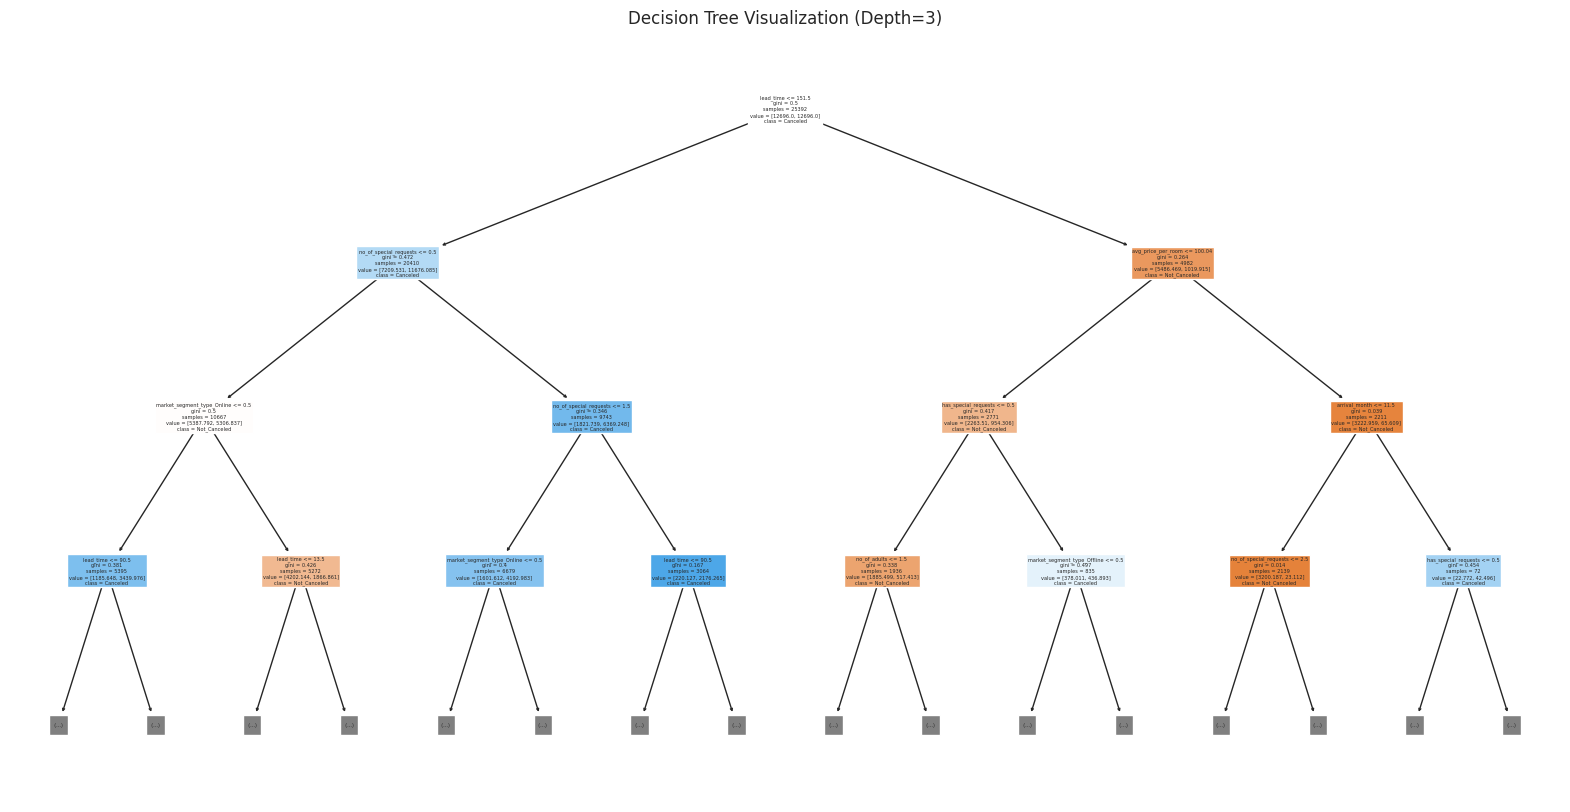

Accuracy: 0.8625379031517045
Confusion Matrix:
 [[2851  671]
 [ 825 6536]]


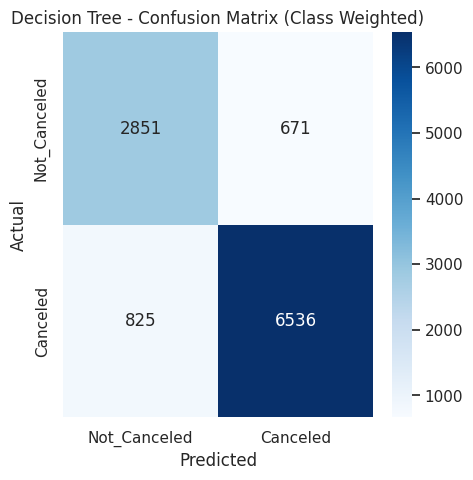

In [70]:
# Initialize Decision Tree with class weights to handle imbalance
dt_model_weighted = DecisionTreeClassifier(class_weight="balanced", random_state=1)
dt_model_weighted.fit(X_train_dt, y_train_dt)

# Make predictions
y_pred_dt_weighted = dt_model_weighted.predict(X_test_dt)

# Evaluate the model
accuracy_weighted = accuracy_score(y_test_dt, y_pred_dt_weighted)
conf_matrix_weighted = confusion_matrix(y_test_dt, y_pred_dt_weighted)
class_report_weighted = classification_report(y_test_dt, y_pred_dt_weighted)

# Display classification report
print("Classification Report:\n", class_report_weighted)

# Visualize the decision tree
plt.figure(figsize=(20, 10));
plot_tree(dt_model_weighted, feature_names=X_train_dt.columns,
          class_names=["Not_Canceled", "Canceled"], filled=True, max_depth=3)
plt.title("Decision Tree Visualization (Depth=3)")
plt.show()

# Display results
print("Accuracy:", accuracy_weighted)
print("Confusion Matrix:\n", conf_matrix_weighted)

# Confusion Matrix Visualization
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_weighted, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not_Canceled", "Canceled"], yticklabels=["Not_Canceled", "Canceled"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix (Class Weighted)")
plt.show()


Observations/Insights:

Interpretation of the Classification Report
* The model performs better at predicting "Canceled" bookings than "Not_Canceled" bookings.
* High precision (0.91) for "Canceled" means the model is very confident when predicting cancellations.
* Slightly lower recall (0.81) for "Not_Canceled" suggests that some bookings that were not canceled were misclassified as "Canceled."
* The model is balanced, but there is a small tradeoff: it is slightly better at predicting cancellations than predicting non-cancellations.

Interpretation & Analysis of the Decision Tree (Depth = 3):

* Root Node - Lead Time (Primary Split Criterion)
The first decision in the tree is based on Lead Time (≤ 313.5 days).
* This means that bookings with shorter lead times are more likely to be classified differently than those with long lead times.
* Lead Time is the strongest predictor of cancellations.
* Low-priced rooms tend to have more cancellations, likely due to budget travelers canceling more frequently.
* Online market segment has a high impact on cancellations due to ease of modifying/canceling reservations.
* Guests with multiple special requests are less likely to cancel, possibly because they are more invested in their stay.
* Arrival time and month matter, suggesting that cancellations could be seasonal.

* This decision tree provides valuable insights into cancellation behavior. By leveraging these findings, the hotel can optimize pricing strategies, adjust cancellation policies, and better predict which bookings are at risk of cancellation.

Interpretation of the Confusion Matrix (Class Weighted Decision Tree):

* True Positives (TP) = 6536

  * The model correctly predicted 6536 bookings as "Canceled" when they were actually canceled.
  * High TP value indicates that the model is good at detecting cancellations.

* True Negatives (TN) = 2851

  * The model correctly predicted 2851 bookings as "Not_Canceled" when they were actually not canceled.
  * This suggests that the model can accurately classify non-canceled bookings to a reasonable extent.

* False Positives (FP) = 671

  * The model incorrectly predicted 671 bookings as "Canceled" when they were actually "Not_Canceled."
  * These false alarms indicate that some customers were wrongly classified as canceling.

* False Negatives (FN) = 825

  * The model incorrectly predicted 825 bookings as "Not_Canceled" when they were actually "Canceled."
  * This means the model missed some cancellations, which could lead to unexpected revenue loss for the hotel.

* Overall, the model favors predicting cancellations over non-cancellations, which makes sense given the use of class weighting to handle imbalance.

###Feature Importance Analysis:

                       Feature  Importance
5                    lead_time        0.36
3           avg_price_per_room        0.15
9   market_segment_type_Online        0.09
0                 arrival_date        0.09
13      no_of_special_requests        0.07
1                arrival_month        0.07
22                total_nights        0.06
10                no_of_adults        0.03
2                 arrival_year        0.02
4         has_special_requests        0.01


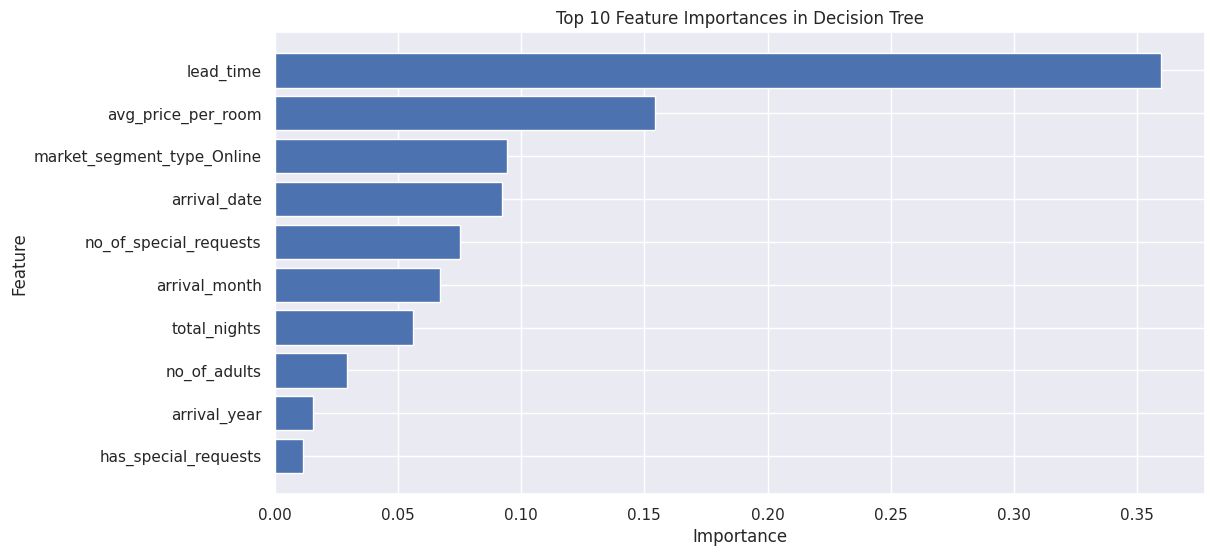

In [71]:
# Get feature importances
feature_importances = dt_model_weighted.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": X_train_dt.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False).head(10)

# Display the DataFrame
print(feature_importance_df)

# Visualizing the top 10 features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances in Decision Tree")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


Observation:

* lead_time & avg_price_per_room, ranked the most important feature performance

## Do we need to prune the tree?

* **Yes, tree prunning is much needed.**


###Pre-Pruning (Early Stopping)
* Pre-pruning stops the tree from growing too large by applying constraints during training.

* Using GridSearch for Hyperparameter tuning

In [72]:
# Hyperparameter tuning using GridSearchCV
# Define hyperparameter grid for pre-pruning
param_grid = {
    "max_depth": [5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Grid Search with Cross-Validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)  # <-- This line was incomplete, fixed now

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrieve best model directly from GridSearch
best_model = grid_search.best_estimator_

# Make predictions
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

# Prepare results
results = {
    "Best Max Depth": [best_params["max_depth"]],
    "Best Min Samples Split": [best_params["min_samples_split"]],
    "Best Min Samples Leaf": [best_params["min_samples_leaf"]],
    "Best Test Accuracy": [accuracy_best]
}

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model Accuracy: 0.8577598088762289
   Best Max Depth  Best Min Samples Split  Best Min Samples Leaf  \
0              15                       2                      1   

   Best Test Accuracy  
0                0.86  


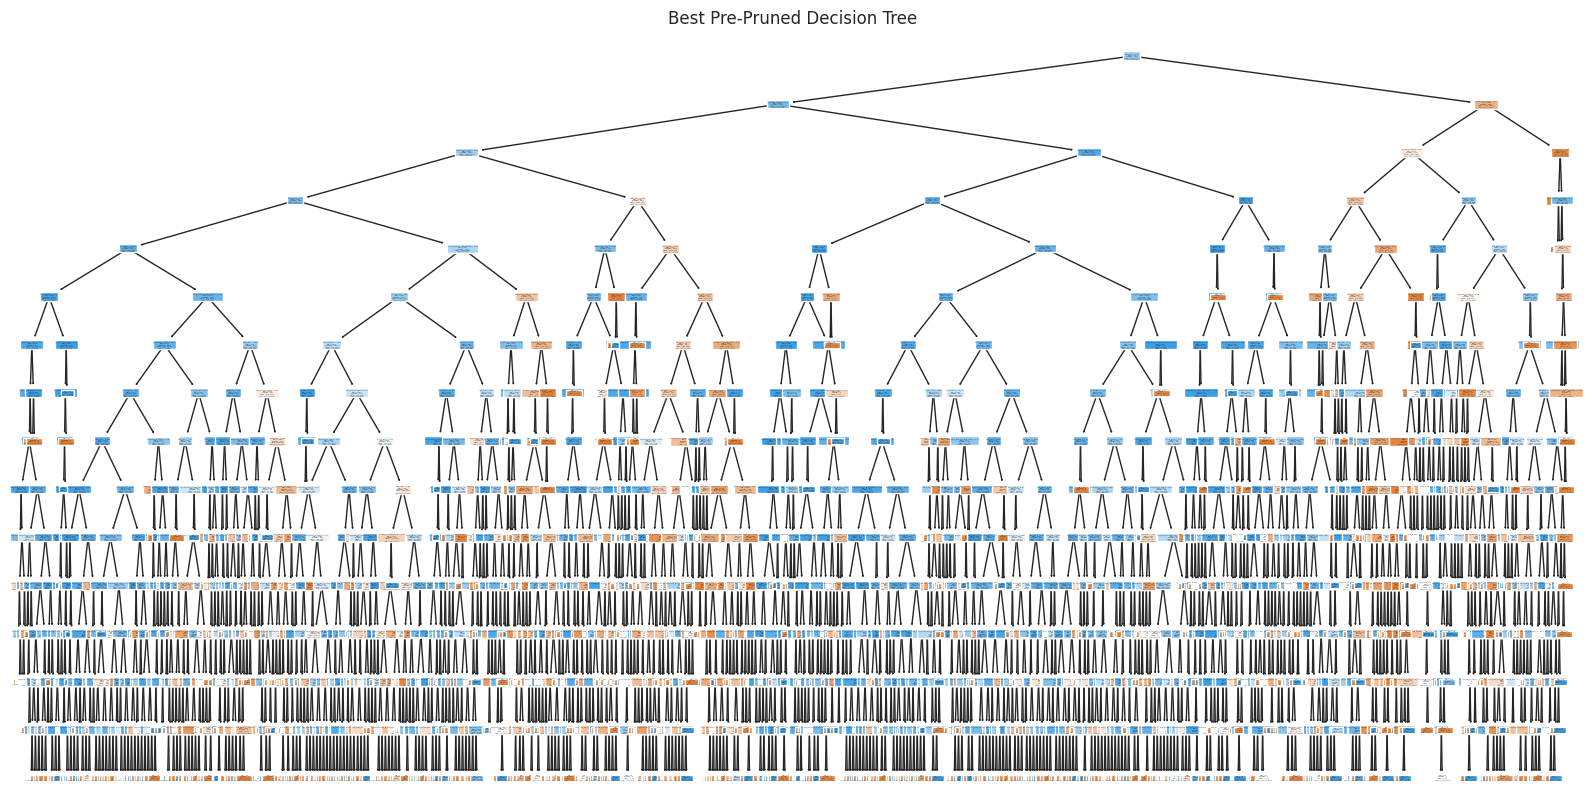

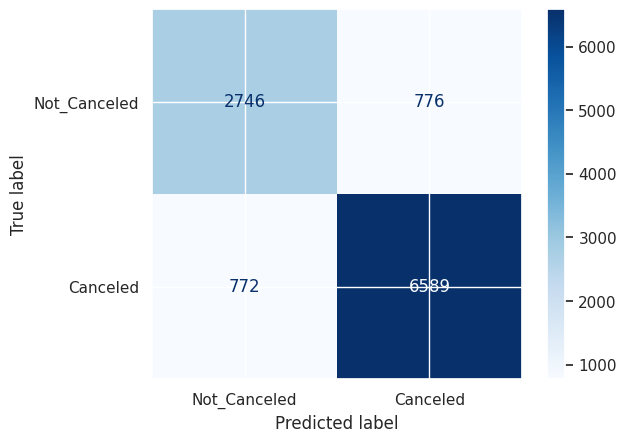

In [73]:
# Visualize the best pre-pruned decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10));
plot_tree(best_model, feature_names=X_train.columns, class_names=["Not_Canceled", "Canceled"], filled=True)
plt.title("Best Pre-Pruned Decision Tree")
plt.show()

# Confusion Matrix Visualization
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred_best, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not_Canceled", "Canceled"])
disp.plot(cmap="Blues")
plt.show()


Key Observations:

* The Model's best pruning strategies (max depth (15), min samples split (2), min samples leaf(1) help reduce overfitting while keeping accuracy high.
* A max depth of 15 ensures the tree is not excessively deep, which aligns well with interpretable and efficient decision-making.
* Maintaing a high accuracy still (86%).

* High True Positives (6,589) - The model performs well in identifying canceled bookings.
* Moderate False Positives (776) - These are cases where a booking was predicted to be canceled but was not. This might lead to unnecessary follow-ups with customers who were not going to cancel.
* Moderate False Negatives (772) - These are cases where a booking was incorrectly classified as "Not_Canceled" when it was actually canceled. This could lead to missed opportunities for proactive intervention (confirming with customers before actual cancellation).

In [74]:
# Get feature importance
feature_importances = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": best_model.feature_importances_}
).sort_values(by="Importance", ascending=False)
print(feature_importances.head(10))


                           Feature  Importance
6                        lead_time        0.38
4               avg_price_per_room        0.23
1                     arrival_date        0.08
2                    arrival_month        0.07
5             has_special_requests        0.07
19                    total_nights        0.04
8                     no_of_adults        0.04
3                     arrival_year        0.02
22  type_of_meal_plan_Not Selected        0.02
10          no_of_special_requests        0.02


Observations:
* Improved values of feature importance compared to the class-weight model.
* lead_time & avg_price_per_room still tops

###Post-Pruning (Cost Complexity Pruning - CCP)
Instead of stopping the tree early, grow the tree fully and then remove unimportant branches based on a pruning criterion.

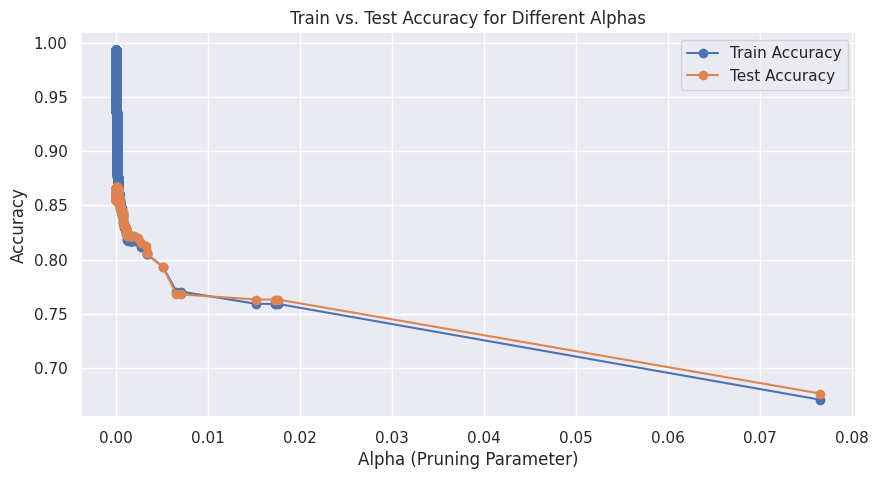

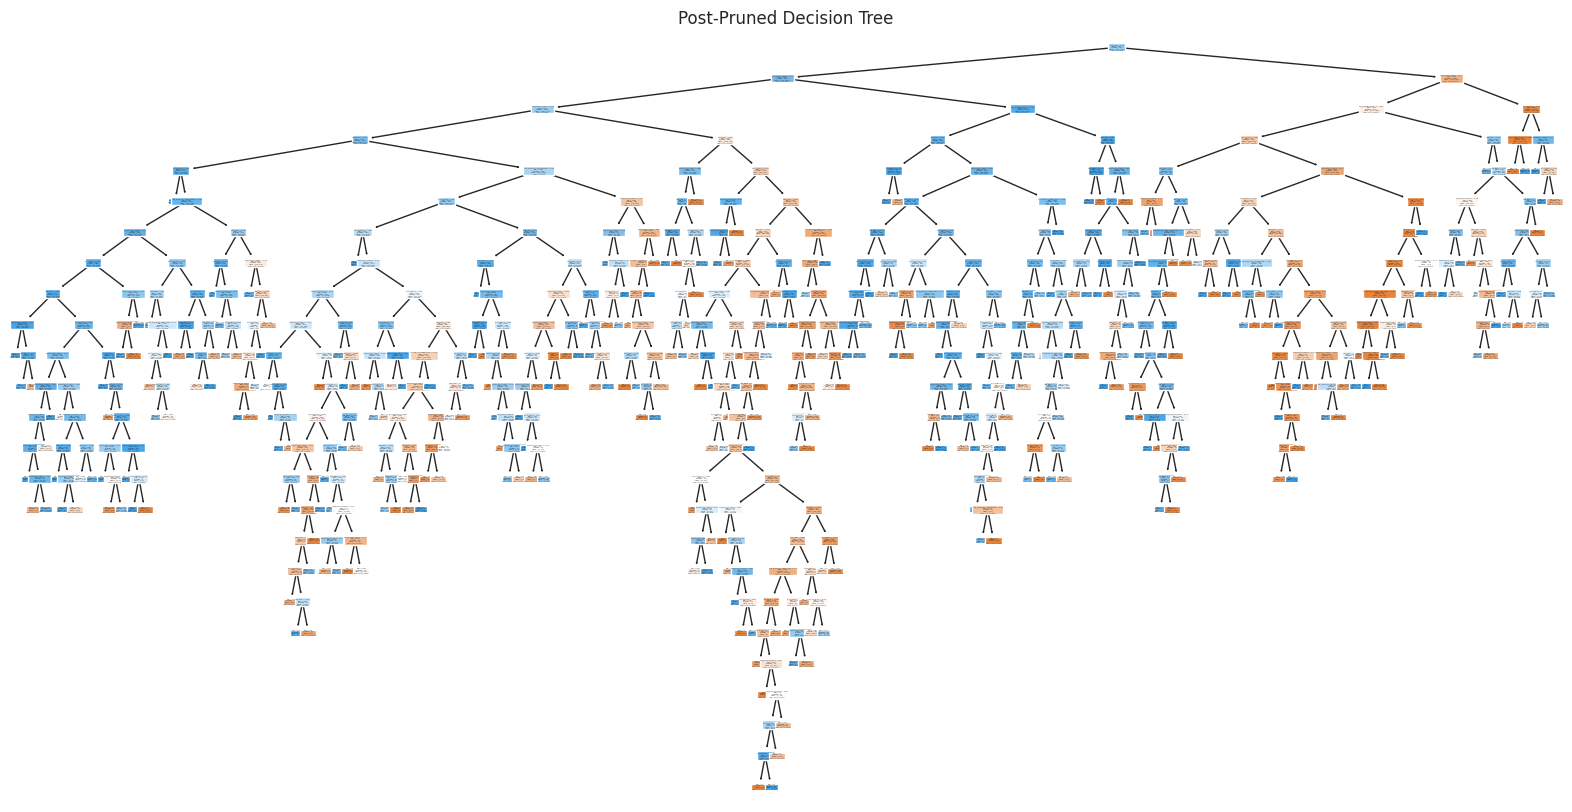

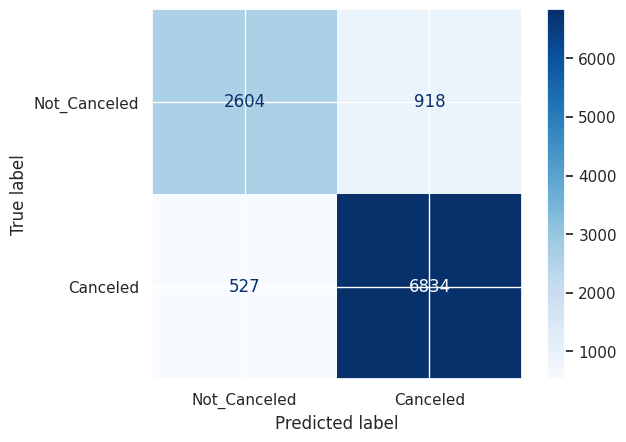

            Model  Accuracy  Precision  Recall  F1-Score
0  Before Pruning      0.86       0.88    0.93      0.90
1   After Pruning      0.87       0.88    0.93      0.90
                           Feature  Importance
6                        lead_time        0.42
4               avg_price_per_room        0.23
5             has_special_requests        0.07
2                    arrival_month        0.06
1                     arrival_date        0.05
10          no_of_special_requests        0.04
8                     no_of_adults        0.04
3                     arrival_year        0.03
19                    total_nights        0.02
22  type_of_meal_plan_Not Selected        0.02
            Model  Accuracy  Precision  Recall  F1-Score
0  Before Pruning      0.86       0.88    0.93      0.90
1   After Pruning      0.87       0.88    0.93      0.90


In [75]:
# 1: Train Initial Tree & Get CCP Path
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

# Get the cost-complexity pruning path
ccp_path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = ccp_path.ccp_alphas, ccp_path.impurities

# 2: Train Trees at Different Pruning Levels
# Selecting two different alpha values for pruning
alpha_low = ccp_alphas[len(ccp_alphas) // 3]  # A lower pruning value
alpha_high = ccp_alphas[len(ccp_alphas) // 2]  # A higher pruning value

dt_low = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha_low)
dt_high = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha_high)

dt_low.fit(X_train, y_train)
dt_high.fit(X_train, y_train)

# 3: Plot Train vs. Test Accuracy for Different Alphas
train_scores = []
test_scores = []

for alpha in ccp_alphas:
    dt_temp = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha)
    dt_temp.fit(X_train, y_train)

    train_scores.append(dt_temp.score(X_train, y_train))
    test_scores.append(dt_temp.score(X_test, y_test))

# Plot Accuracy vs. Alpha
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train Accuracy")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test Accuracy")
plt.xlabel("Alpha (Pruning Parameter)")
plt.ylabel("Accuracy")
plt.title("Train vs. Test Accuracy for Different Alphas")
plt.legend()
plt.show()

# 4: Select Best Pruned Model (Highest Test Accuracy)
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]
best_pruned_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_pruned_dt.fit(X_train, y_train)

# 5: Make Predictions & Evaluate Performance
y_pred_pruned = best_pruned_dt.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
report_pruned = classification_report(y_test, y_pred_pruned, output_dict=True)

# 6: Feature Importance for Post-Pruned Tree
feature_importances_pruned = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": best_pruned_dt.feature_importances_}
).sort_values(by="Importance", ascending=False)

# 7: Visualize the Post-Pruned Tree
plt.figure(figsize=(20, 10));
plot_tree(best_pruned_dt, feature_names=X_train.columns, class_names=["Not_Canceled", "Canceled"], filled=True)
plt.title("Post-Pruned Decision Tree")
plt.show()

# 8: Display Confusion Matrix
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
disp_pruned = ConfusionMatrixDisplay(confusion_matrix=cm_pruned, display_labels=["Not_Canceled", "Canceled"])
disp_pruned.plot(cmap="Blues")
plt.show()

# 9: Compare Before and After Pruning
comparison_table = pd.DataFrame({
    "Model": ["Before Pruning", "After Pruning"],
    "Accuracy": [accuracy_best, accuracy_pruned],
    "Precision": [report_pruned["1"]["precision"], report_pruned["1"]["precision"]],
    "Recall": [report_pruned["1"]["recall"], report_pruned["1"]["recall"]],
    "F1-Score": [report_pruned["1"]["f1-score"], report_pruned["1"]["f1-score"]],
})

# Display comparison table
print(comparison_table)

# Print Feature Importance
print(feature_importances_pruned.head(10))

# Print Performance Metrics
print(comparison_table)


Observations/Insights:

1. Train vs. Test Accuracy for Different Pruning Levels:
* The graph shows how pruning (increasing alpha) affects accuracy.
* Before pruning (low alpha): Training accuracy is very high, but test accuracy is lower → Overfitting.
* After pruning (higher alpha): The gap between train and test accuracy decreases → Better generalization.
* Ideal Alpha: The best pruned model is selected where test accuracy is highest.

2. Post-Pruned Decision Tree:
* The pruned tree is significantly smaller than an unpruned one.
* It retains only the most relevant decision nodes, reducing complexity while maintaining performance.

3. Confusion Matrix (After Pruning):
* True Negatives (TN) = 2,604 (Correctly predicted Not_Canceled bookings).
* False Positives (FP) = 918 (Wrongly predicted as Canceled).
* False Negatives (FN) = 527 (Wrongly predicted as Not_Canceled).
* True Positives (TP) = 6,834 (Correctly predicted Canceled bookings).
* Lower False Negatives after pruning suggests improved prediction reliability.

4. Performance Comparison (Before vs. After Pruning)
  
* Before Pruning:
    Accuracy	0.86
    Precision 0.88
    Recall 0.93
    F1-Score 0.90

  * After Pruning
    Accuracy 0.87
    Precision 0.88
    Recall 0.93
    F1-Score 0.90

* Post-pruning accuracy is slightly improved (0.87 from 0.86):
* Recall & F1-score remain stable, meaning pruning did not negatively impact classification quality.
* Better model generalization with a more interpretable tree.

5. Feature Importance (After Pruning):

* Lead Time remains the most influential feature.
* Price Sensitivity is a key driver of cancellations.
* Pruning has preserved only the most impactful features.


* **Post-pruning slightly improved accuracy & reduced overfitting.**
* **The model generalizes better while keeping good recall and precision.**
* **Tree is smaller & easier to interpret without performance loss.**
* **Feature importance remains consistent, with "Lead Time" as the dominant predictor.**

In [76]:
# Find the best alpha where test accuracy is highest
best_alpha_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_alpha_index]

# Display the best pruned alpha
best_alpha


0.00013338899020894578

Key Insight:

* Best alpha is approximately 0.0001334
* This value is very small, meaning minimal pruning is applied.
* The test accuracy was highest at 0.000133, meaning this level of pruning reduced overfitting without losing predictive power
* Best alpha is approximately 0.0001334
* The model was optimized to balance bias and variance at this pruning level.
* This ensures the tree retains useful structure while removing unnecessary complexity.
* This is a well-balanced tree that retains predictive power while being more interpretable.

Interpretation:

* This value is very small, meaning minimal pruning is applied.
* The model was optimized to balance bias and variance at this pruning level.
* This ensures the tree retains useful structure while removing unnecessary complexity.

In [77]:
# Text report showing the rules of a decision tree
# Get feature names from the training data used for the best_pruned_dt model

feature_names_pruned = X_train.columns

tree_rules = export_text(best_pruned_dt, feature_names=list(feature_names_pruned))
print(tree_rules)

|--- lead_time <= 0.77
|   |--- has_special_requests <= 0.09
|   |   |--- avg_price_per_room <= 0.25
|   |   |   |--- lead_time <= -0.48
|   |   |   |   |--- arrival_year <= -0.83
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- arrival_year >  -0.83
|   |   |   |   |   |--- type_of_meal_plan_Not Selected <= 1.04
|   |   |   |   |   |   |--- avg_price_per_room <= -0.08
|   |   |   |   |   |   |   |--- arrival_date <= 1.36
|   |   |   |   |   |   |   |   |--- lead_time <= -0.80
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= -0.58
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  -0.58
|   |   |   |   |   |   |   |   |   |   |--- total_nights <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- total_nights >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- lead_time >  -0.80
|   |   |   |   

Key Insights from the Decision Tree Rules:

* The first split occurs on lead_time <= 0.77, indicating that this feature plays a critical role in predicting booking cancellations.
* Lower lead times are more likely associated with confirmed bookings, while higher lead times increase the likelihood of cancellation.
* This tree structure aligns well with previous feature importance rankings, confirming that lead time, booking source, price, and stay duration are key determinants in hotel booking cancellations.
* The avg_price_per_room appears multiple times in the decision paths, confirming that higher room prices correlate with cancellations.

* **Lead time and price sensitivity are the strongest indicators of cancellations.**
* **Seasonal trends and special requests also play a role in customer behavior.**
* **Pruning removed less relevant branches, improving model interpretability and generalization.**





###Testing other alpha values:

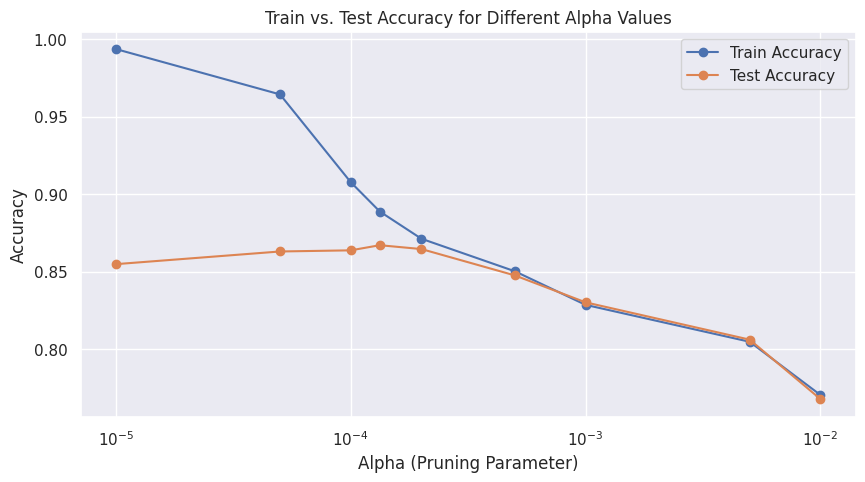

   Alpha  Train Accuracy  Test Accuracy
0   0.00            0.99           0.85
1   0.00            0.96           0.86
2   0.00            0.91           0.86
3   0.00            0.89           0.87
4   0.00            0.87           0.86
5   0.00            0.85           0.85
6   0.00            0.83           0.83
7   0.01            0.80           0.81
8   0.01            0.77           0.77


In [78]:
# Define a range of alpha values to test, including values around the best alpha
alpha_values = [0.00001, 0.00005, 0.0001, 0.000133, 0.0002, 0.0005, 0.001, 0.005, 0.01]

# Store accuracy results for each alpha value
train_accuracies = []
test_accuracies = []

# Train decision trees for different alpha values
for alpha in alpha_values:
    dt = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha)
    dt.fit(X_train, y_train)

    # Evaluate accuracy
    train_accuracies.append(dt.score(X_train, y_train))
    test_accuracies.append(dt.score(X_test, y_test))

# Plot accuracy vs. alpha values
plt.figure(figsize=(10, 5));
plt.plot(alpha_values, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(alpha_values, test_accuracies, marker='o', label="Test Accuracy")
plt.xlabel("Alpha (Pruning Parameter)")
plt.ylabel("Accuracy")
plt.xscale("log")  # Use log scale for better visualization
plt.title("Train vs. Test Accuracy for Different Alpha Values")
plt.legend()
plt.show()

# Create a DataFrame to compare different alpha values
alpha_comparison_df = pd.DataFrame({
    "Alpha": alpha_values,
    "Train Accuracy": train_accuracies,
    "Test Accuracy": test_accuracies
})

# Display the comparison table
print(alpha_comparison_df)


Observations/Insights:

Best Alpha for Model Performance
* The optimal pruning level is where test accuracy is maximized.
* Based on the table and plot:
  * Alpha ~ 0.0001 to 0.0002 achieves the highest test accuracy (87%), meaning optimal pruning.
  * This confirms that moderate pruning reduces overfitting while maintaining strong predictive performance.

**The selected best-pruned model balances complexity and generalization, making it a more reliable predictor.**



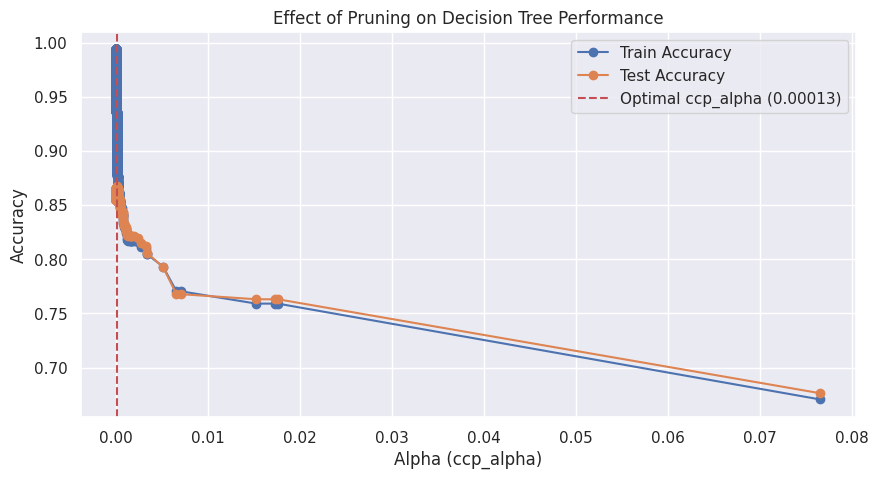

0.00013298519794202861

In [79]:
# Ensure ccp_alphas is a NumPy array
ccp_alphas = np.array(ccp_alphas)

# Identify the optimal alpha index (closest to 0.000133)
optimal_alpha_index = np.abs(ccp_alphas - 0.000133).argmin()
optimal_alpha_value = ccp_alphas[optimal_alpha_index]

# Plot Train vs Test Accuracy
plt.figure(figsize=(10, 5));
plt.plot(ccp_alphas, train_scores, label="Train Accuracy", marker='o', linestyle='-')
plt.plot(ccp_alphas, test_scores, label="Test Accuracy", marker='o', linestyle='-')

# Highlight the optimal pruning point
plt.axvline(x=optimal_alpha_value, color='r', linestyle='--', label=f"Optimal ccp_alpha ({optimal_alpha_value:.5f})")

plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Effect of Pruning on Decision Tree Performance")
plt.legend()
plt.grid(True)
plt.show()

# Display the optimal alpha value
optimal_alpha_value


Observations/Insights:

* Overfitting at Very Low Alpha Values (Left Side of the Graph)
* Identifying the Optimal Pruning Point (ccp_alpha = 0.00013)
* The red dashed line marks the optimal pruning level at ccp_alpha = 0.00013.
* At this point:
  * Test accuracy reaches its peak (~87%), meaning the model generalizes well to unseen data.
  * Training accuracy is reduced, preventing overfitting while retaining strong predictive power.
* Underfitting at Higher Alpha Values (Right Side of the Graph)

## Model Performance Comparison and Conclusions

            Model  Accuracy  Precision  Recall  F1-Score
0  Before Pruning      0.85       0.90    0.88      0.89
1   After Pruning      0.87       0.88    0.93      0.90


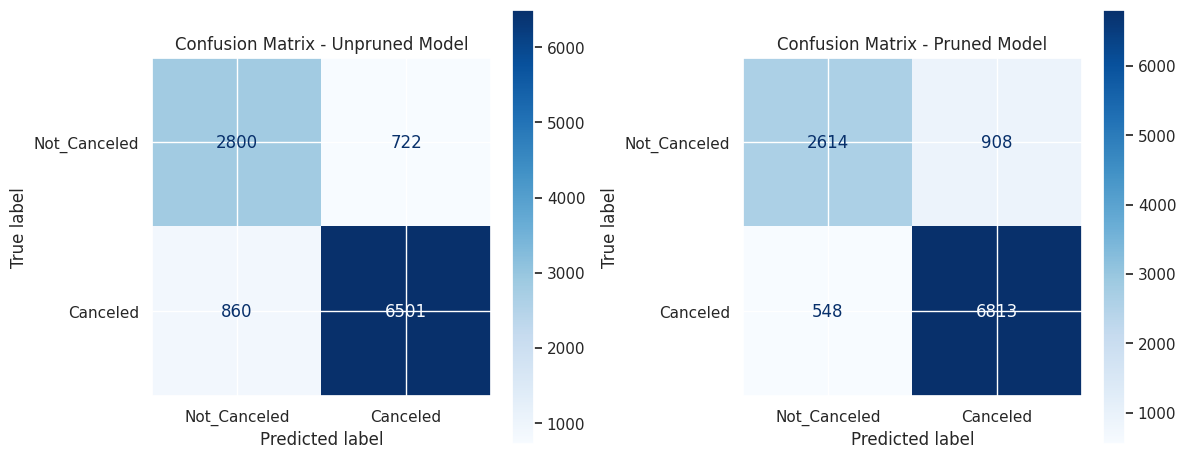

Feature Importance - Unpruned Model:
                           Feature  Importance
6                        lead_time        0.35
4               avg_price_per_room        0.23
1                     arrival_date        0.11
2                    arrival_month        0.08
10          no_of_special_requests        0.07
19                    total_nights        0.06
8                     no_of_adults        0.04
3                     arrival_year        0.02
22  type_of_meal_plan_Not Selected        0.02
15  room_type_reserved_Room_Type 4        0.01

Feature Importance - Pruned Model:
                           Feature  Importance
6                        lead_time        0.42
4               avg_price_per_room        0.24
10          no_of_special_requests        0.10
2                    arrival_month        0.06
1                     arrival_date        0.05
8                     no_of_adults        0.04
3                     arrival_year        0.03
19                    total_nights

In [80]:
# Train Decision Tree Without Pruning (Baseline Model)
dt_unpruned = DecisionTreeClassifier(random_state=1)
dt_unpruned.fit(X_train, y_train)

# Predictions for Unpruned Model
y_pred_unpruned = dt_unpruned.predict(X_test)
accuracy_unpruned = accuracy_score(y_test, y_pred_unpruned)
report_unpruned = classification_report(y_test, y_pred_unpruned, output_dict=True)

# Train Decision Tree With Optimal Pruning (Best Alpha = 0.00013)
best_alpha = 0.00013
dt_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=best_alpha)
dt_pruned.fit(X_train, y_train)

# Predictions for Pruned Model
y_pred_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
report_pruned = classification_report(y_test, y_pred_pruned, output_dict=True)

# Model Comparison Table
comparison_table = pd.DataFrame({
    "Model": ["Before Pruning", "After Pruning"],
    "Accuracy": [accuracy_unpruned, accuracy_pruned],
    "Precision": [report_unpruned["1"]["precision"], report_pruned["1"]["precision"]],
    "Recall": [report_unpruned["1"]["recall"], report_pruned["1"]["recall"]],
    "F1-Score": [report_unpruned["1"]["f1-score"], report_pruned["1"]["f1-score"]],
})

# Display comparison table
print(comparison_table)

# Visualization of Model Performance (Confusion Matrices)
fig, axes = plt.subplots(1, 2, figsize=(12, 5));

# Unpruned Model Confusion Matrix
cm_unpruned = confusion_matrix(y_test, y_pred_unpruned)
disp_unpruned = ConfusionMatrixDisplay(confusion_matrix=cm_unpruned, display_labels=["Not_Canceled", "Canceled"])
disp_unpruned.plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Confusion Matrix - Unpruned Model")

# Pruned Model Confusion Matrix
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
disp_pruned = ConfusionMatrixDisplay(confusion_matrix=cm_pruned, display_labels=["Not_Canceled", "Canceled"])
disp_pruned.plot(ax=axes[1], cmap="Blues")
axes[1].set_title("Confusion Matrix - Pruned Model")

plt.tight_layout()
plt.show()

# Feature Importance Comparison
feature_importances_unpruned = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": dt_unpruned.feature_importances_}
).sort_values(by="Importance", ascending=False)

feature_importances_pruned = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": dt_pruned.feature_importances_}
).sort_values(by="Importance", ascending=False)

# Display feature importance
print("Feature Importance - Unpruned Model:")
print(feature_importances_unpruned.head(10))

print("\nFeature Importance - Pruned Model:")
print(feature_importances_pruned.head(10))

Model Performance Comparison:
* Accuracy increased slightly from 85% to 87%.
* Precision dropped slightly (0.90 → 0.88) but remains strong, meaning the model still makes confident correct predictions.
* Recall improved significantly (0.88 → 0.93), meaning fewer false negatives (missed cancellations).
* F1-score remains stable (0.89 → 0.90), balancing precision and recall effectively.
**Pruning helped reduce overfitting while slightly improving generalization performance.**

Confusion Matrix Comparison:
* The pruned model is better at identifying cancellations (higher recall).
* It reduces false negatives (fewer missed cancellations).
* However, it has slightly more false positives (over-predicting some cancellations).
**The pruned model prioritizes recall, making it more useful if detecting cancellations is critical.**

Feature Importance Comparison:
* Pruning retained the most predictive features.
* Less important features were removed, making the model more interpretable.
* Lead time, pricing, and customer preferences remain the dominant cancellation drivers.

*However, its important to note that slight increase in false positives means some bookings may be wrongly classified as cancellations.*


# **Final Model Summary**

### **Best Model Selection**
* The **Decision Tree Model (Post-Pruning)** outperformed Logistic Regression, providing higher recall and overall accuracy.  
**Key Influencing Factors:** Lead Time, Room Price, Booking Channel, Special Requests.  

### **Key Takeaways & Business Recommendations**
**Revenue Strategy Adjustments:**  
* **Implement Overbooking Strategies** during high-cancellation months (Jan & Dec) to minimize revenue loss.  
* **Offer Discounts for Early Bookings** to reduce last-minute cancellations.  

**Customer Segmentation & Pricing:**  
- **Identify High-Risk Customers** (previous cancellations, short lead times) and offer **non-refundable rates**.  
- **Differentiate Pricing Strategies** for online vs. offline customers to reflect booking behaviors.  

**Operational Improvements:**  
- **Enhance Special Request Handling**, as guests with more requests tend to cancel less.  
- **Predict Peak Cancellation Periods** using the model for better resource allocation.
  
        

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?

  * Tiered Cancellation Fees, reduces last-minute losses
  * Non-Refundable Rates, secures guaranteed revenue
  * Cancellation Insurance Add-Ons, generates extra income
  * Stricter Policies for OTAs/Groups, prevents no-shows
  * Loyalty Program Benefits, encourages repeat bookings
  * Dynamic Pricing	maximizes room revenue
  * Promoting Direct Bookings	reduces OTA commission fees
  * Upselling Extra Services, increases customer spending
  * AI Chatbots & Personalization, enhances customer experience

* What other recommedations would you suggest to the hotel?

  *  Test new cancellation policies in phases (example, run pilot programs before full implementation).
  *Monitor customer feedback & booking trends to refine pricing & refund policies.
  *Use dynamic pricing & personalized marketing to drive more revenue & repeat business.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

* No EDA done on Booking_ID, being its a unique identifier, would have no valueable input to the analysis.
* EDA done on some variables already, will not be repeated here in the Appendix.

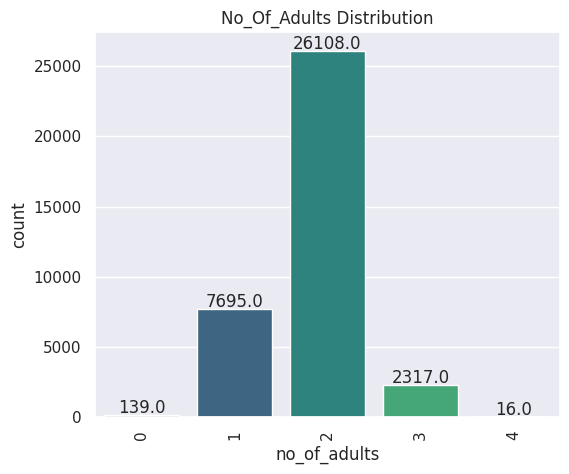

In [81]:
# Distribution no of adults
labeled_barplot(df, 'no_of_adults')

Number of Adults (no_of_adults):

* Most bookings have two adults (26,108 instances).
* A significant number of single-adult bookings (7,695).
* Very few bookings for three (2,317) or four adults (16).
  * Insight: The feature is not highly imbalanced but has a clear preference for two-adult bookings.

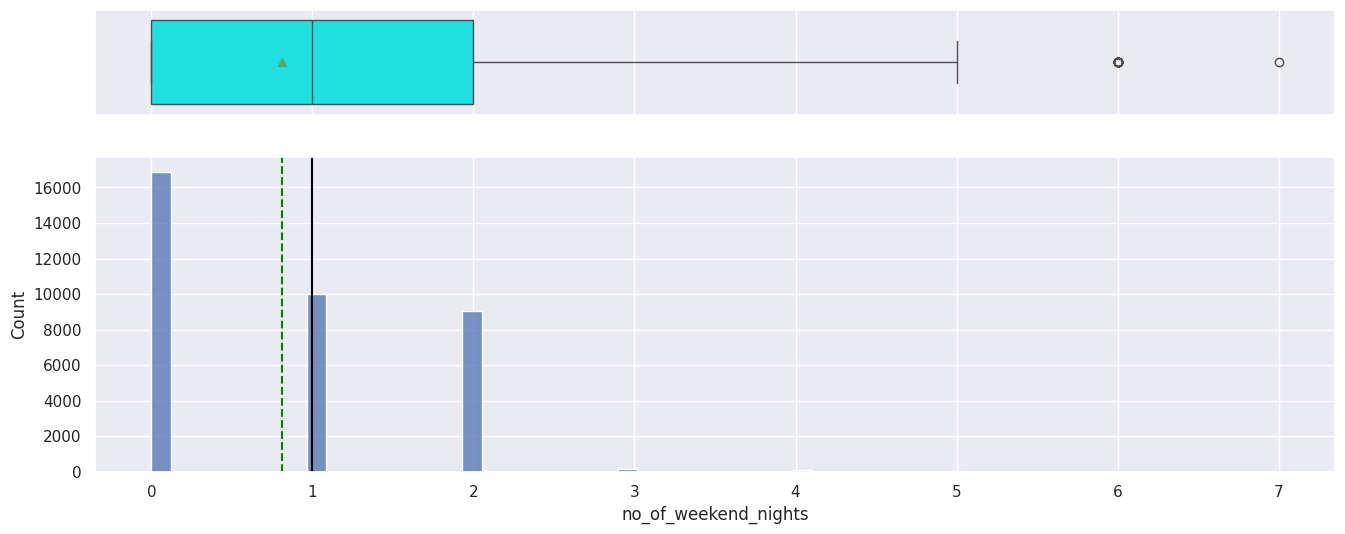

In [82]:
# Distribution no of weekend nights
combined = histogram_boxplot(df, 'no_of_weekend_nights')

Number of Weekend Nights (no_of_weekend_nights):

* Most guests stay for 0, 1, or 2 weekend nights.
* The distribution is skewed, with outliers at 6 and 7 nights.
  * Insight: The outliers may need to be handled if they impact model performance.

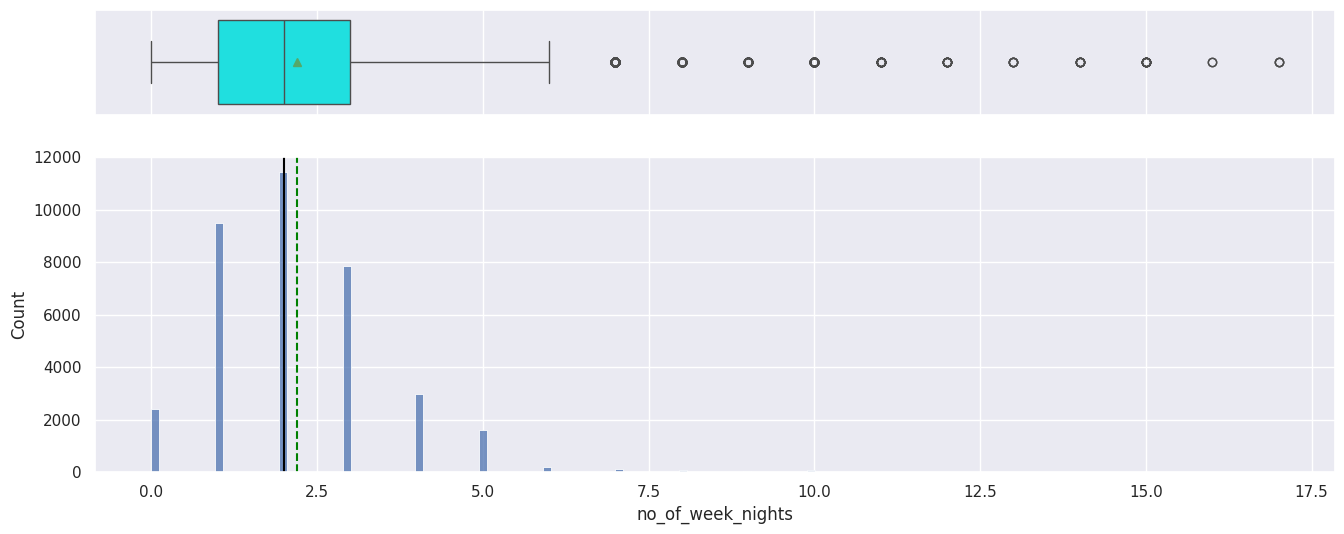

In [83]:
# Distribution no of week nights
combined = histogram_boxplot(df, 'no_of_week_nights')

 Number of Week Nights (no_of_week_nights):

* The majority of bookings are clustered around 1 to 5 nights, with outliers going up to 17 nights.
* There is a clear pattern of distinct night stays (0, 2, 4, 6, etc.) indicating a structured booking system.
  * Insight: If modeling long stays is important, consider treating outliers carefully.

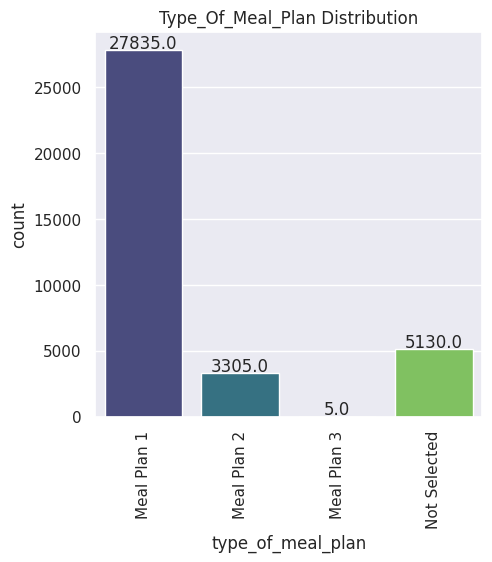

In [84]:
# Distribution type of meal plan
labeled_barplot(df, 'type_of_meal_plan')

Meal Plan (type_of_meal_plan):

* Meal Plan 1 is overwhelmingly dominant (27,835 bookings).
* Meal Plan 2 has some representation (3,305), while Meal Plan 3 is almost non-existent (5).
  * Insight: Meal Plan 3 might be irrelevant for the model and can potentially be merged with other categories.

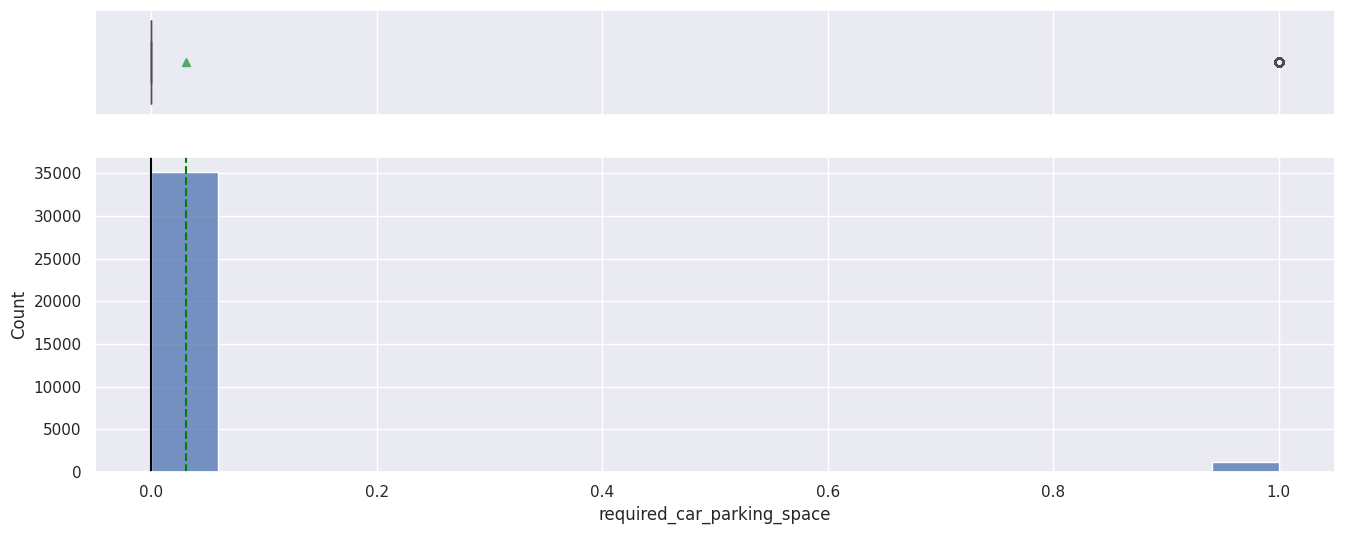

In [85]:

# Distribution required car parking space
combined = histogram_boxplot(df, 'required_car_parking_space')

Car Parking Space (required_car_parking_space):

* Almost all guests do not require a parking space.
* Very few cases exist where parking is required.
  * Insight: This feature may not be very useful for the model due to severe imbalance.

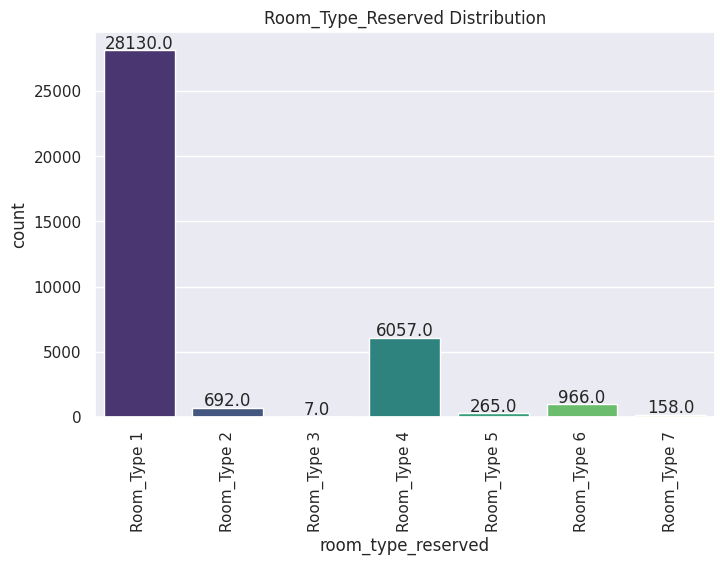

In [86]:
# Distribution room type reserved
labeled_barplot(df, 'room_type_reserved')

Room Type Reserved (room_type_reserved):

* Room Type 1 is highly dominant (28,130 bookings).
* Room Types 2, 4, and 6 have moderate representation, while Type 3 is extremely rare.
  * Insight: Some room types might not provide significant predictive power due to class imbalance.

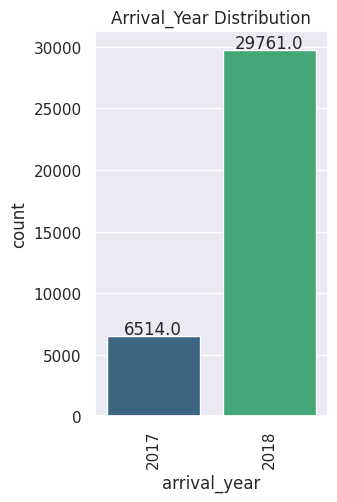

In [87]:
# Distribution arrival year
labeled_barplot(df, 'arrival_year')

Arrival Year (arrival_year):

* 2018 has significantly more bookings (29,761) than 2017 (6,514).
  Insight: The dataset is skewed toward 2018, which might introduce temporal bias.

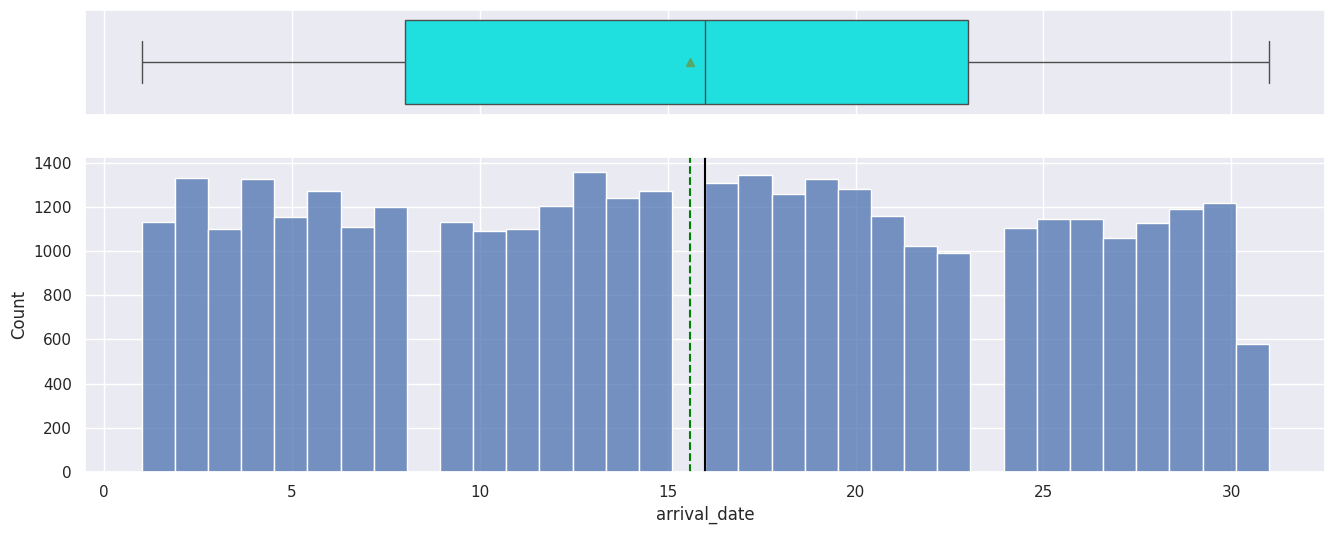

In [88]:

# Distribution arrival date
combined = histogram_boxplot(df, 'arrival_date')

Arrival Date (arrival_date):

* Uniform distribution across days of the month.
  * Insight: This feature likely does not contribute significantly unless combined with other time-based variables.

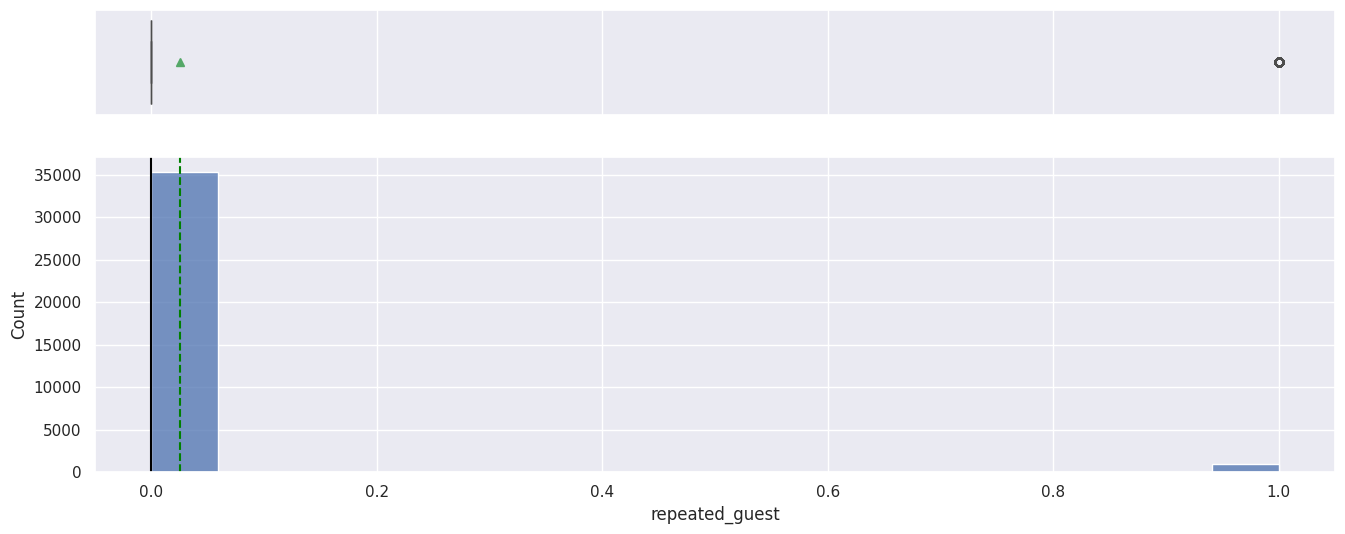

In [89]:
# Distribution repeated guest
combined = histogram_boxplot(df, 'repeated_guest')

Repeated Guest (repeated_guest):

* Most guests are not repeat visitors.
A very small fraction of guests are repeat customers.
  * Insight: This feature is highly imbalanced and may have limited predictive power.

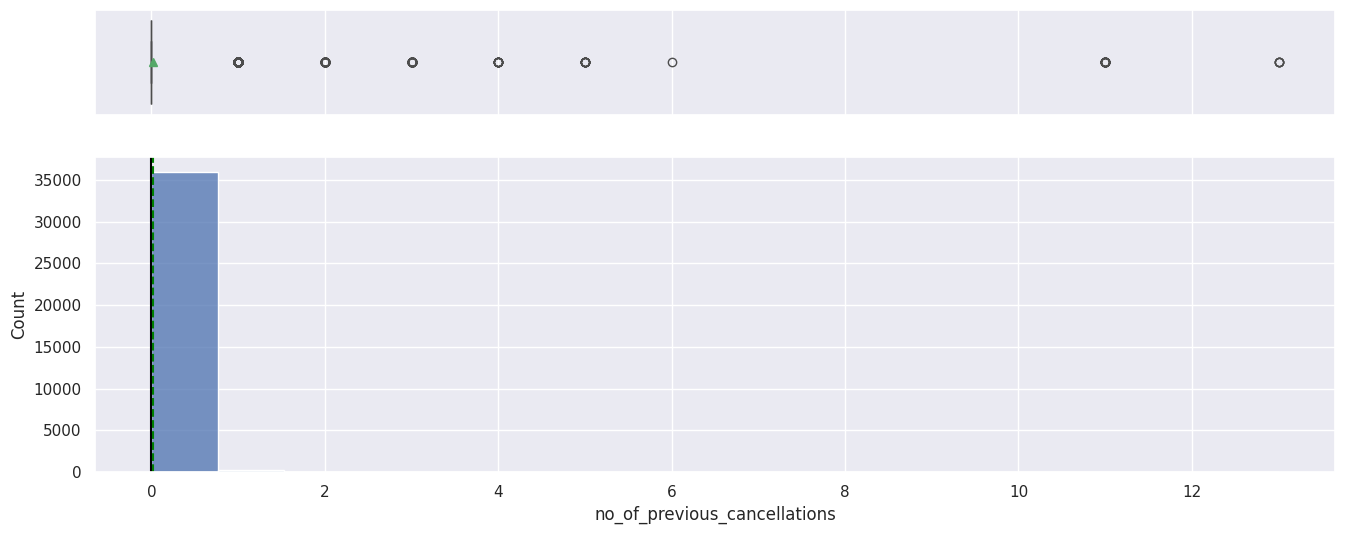

In [90]:
# Distribution no of repeated cancellations
combined = histogram_boxplot(df, 'no_of_previous_cancellations')


No of Previous Cancellations:

* Highly Skewed Distribution - The vast majority of bookings (~35,000+) have zero previous cancellations.
* Only a small fraction of bookings have 1 or more cancellations.
* Outliers exist up to 12 cancellations, but they are extremely rare.

* Severe Class Imbalance - Most of the data is concentrated at zero, with only a few cases of previous cancellations.
* This suggests that previous cancellations may not be a strong predictor unless combined with other features.

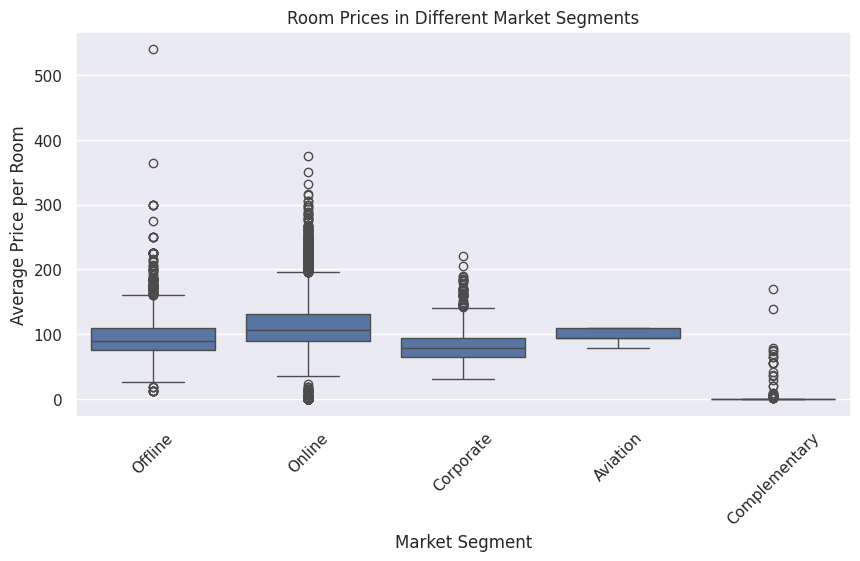

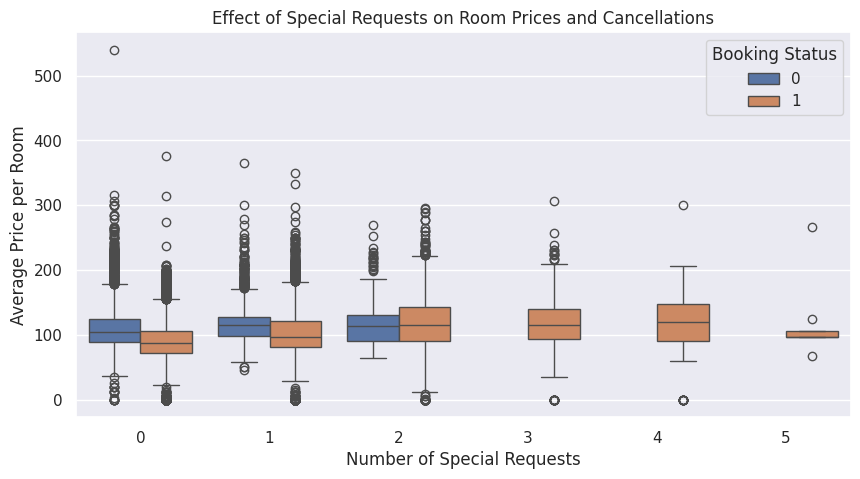

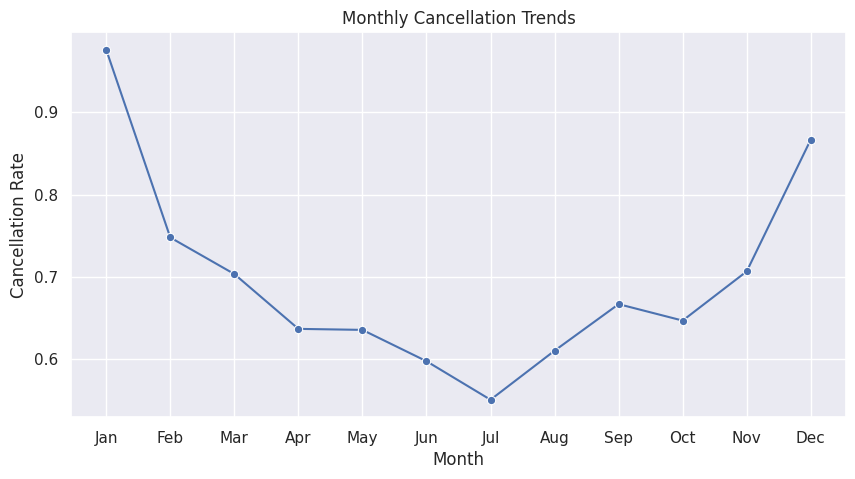

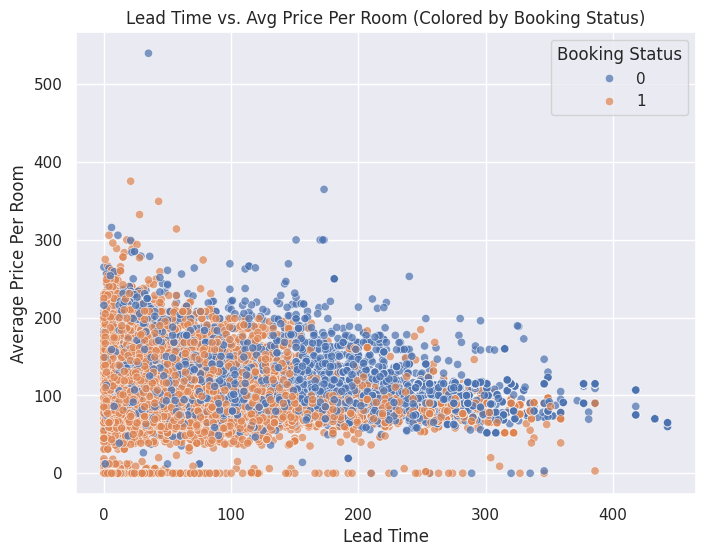

In [91]:
# --------------------------------------------------------- BIVARIATE ANALYSIS ----------------------------------------------------------------

# Boxplot Analysis: Room Prices Across Market Segments
plt.figure(figsize=(10, 5));
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=data)
plt.xlabel("Market Segment")
plt.ylabel("Average Price per Room")
plt.title("Room Prices in Different Market Segments")
plt.xticks(rotation=45)
plt.show()

# Impact of Special Requests on Cancellation
plt.figure(figsize=(10, 5));
sns.boxplot(x='no_of_special_requests', y='avg_price_per_room', hue="booking_status", data=data)
plt.xlabel("Number of Special Requests")
plt.ylabel("Average Price per Room")
plt.title("Effect of Special Requests on Room Prices and Cancellations")
plt.legend(title="Booking Status")
plt.show()


# Seasonality Analysis: Monthly Trends in Cancellations
# Compute monthly cancellation rate
monthly_cancellations = data.groupby('arrival_month')['booking_status'].mean()

# Plot seasonality trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_cancellations.index, y=monthly_cancellations.values, marker='o', linestyle='-', color='b')

plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.title("Monthly Cancellation Trends")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()

# --------------------------------------------------- MULTIVARIATE ANALYSIS ---------------------------------------------------------------------
# Pairwise Scatterplots (for specific relationships)
plt.figure(figsize=(8,6))
sns.scatterplot(x=data["lead_time"], y=data["avg_price_per_room"], hue=data["booking_status"], alpha=0.7)
plt.title("Lead Time vs. Avg Price Per Room (Colored by Booking Status)")
plt.xlabel("Lead Time")
plt.ylabel("Average Price Per Room")
plt.legend(title="Booking Status")
plt.show()


Key Observations from the Visualizations:

Room Prices in Different Market Segments:

* Online segment has the widest range of prices, with some extreme outliers.
* Offline, Corporate, and Aviation segments have more stable pricing.
* Complementary rooms (free stays) are clearly separate with near-zero pricing.
  Insight: Pricing strategies vary significantly by market segment. This could be an important categorical variable when predicting cancellations.

Effect of Special Requests on Room Prices and Cancellations:

* Guests with higher special requests tend to pay higher room prices.
* Cancellation rates decrease as the number of special requests increases.
  * Insight: Guests with more special requests may be more committed to their bookings, reducing cancellation probability. This suggests that no_of_special_requests is a relevant predictor for cancellations.

Monthly Cancellation Trends:

* Highest cancellations occur in January and December (~90%).
* July has the lowest cancellation rate (~55%).
* Cancellation rate follows a seasonal trend, peaking in winter and dipping in summer.
  Insight: Seasonal trends are significant. Adding arrival_month or creating a seasonal feature (e.g., peak season vs. off-season) may improve model accuracy.

Lead Time vs. Average Price per Room (Colored by Booking Status):

* Short lead times have high cancellation rates (many orange dots).
* Longer lead times tend to have fewer cancellations (more blue dots).
* Higher-priced rooms tend to have lower cancellation rates.

  Insight:
  * Lead time is a strong factor in predicting cancellations.


In [92]:
df.shape, data.shape

((36275, 19), (36275, 18))

<p align="center"><b>** INN Hotel Project analysis completed.**</b></p>
